<a href="https://colab.research.google.com/github/HafianeAdem/Impl-mentation-de-ma-m-thode-SMOTE-kmeans-et-adasyn-/blob/main/Copie_de_FINAL_CCFCODE_Implementation_de_ma_m%C3%A9thode_kmeans_smote_et_kmeans_adasyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


MA METHODE DE KMEANS ET SMOTE ( augmenter les clusters dont le taux est sup à la condition )
---



In [ ]:
! pip install -keras
!pip install -q kaggle


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -k


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [ ]:
! mkdir ~/.kaggle
#creation kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/
#copie le json dans le kaggle creer

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                   480KB  2023-01-04 12:50:31           1862         73  1.0              
thedevastator/global-fossil-co2-emissions-by-country-2002-2022  Emissions by Country, 2002-2022              621KB  2023-01-02 20:10:36           1040         39  1.0              
die9origephit/fifa-world-cup-2022-complete-dataset              Fifa World Cup 2022: Complete Dataset          7KB  2022-12-18 22:51:11           5305        173  1.0              
rakkesharv/spotify-top-10000-streamed-songs                     Spotify Top 10000 Streamed Song

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 88% 58.0M/66.0M [00:00<00:00, 139MB/s]
100% 66.0M/66.0M [00:00<00:00, 138MB/s]


In [ ]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
!pip install scikit-learn
!pip install imbalanced-learn
!pip install imblearn
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
 %matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import scipy
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import IsolationForest , RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_auc_score , precision_score , silhouette_score , plot_confusion_matrix , plot_precision_recall_curve , recall_score , plot_roc_curve
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE ,KMeansSMOTE , RandomOverSampler , ADASYN
from collections import Counter


In [ ]:
df = pd.read_csv("creditcard.csv")

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [ ]:
df['Class'].value_counts()
fraud = df[df['Class']==1]#Classe min -> fraud
normal = df[df['Class']==0]#Classe maj -> normal
print(fraud.shape,normal.shape,df.shape)

(492, 31) (284315, 31) (284807, 31)


In [ ]:
len(df)

284807

In [ ]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
X = df.drop(columns=['Time','Amount','Class'], axis=1)
Y = df['Class']
#Split

In [ ]:
#X ET Y DE LA CLASSE FRAUDE :
XFRAUDE = fraud.drop(columns=['Time','Amount','Class'], axis=1)
YFRAUDE = fraud['Class']

In [ ]:
#X ET Y DE LA CLASSE NORMAL :
XNORMAL = normal.drop(columns=['Time','Amount','Class'], axis=1)
YNORMAL = normal['Class']

In [ ]:
print(X.shape,Y.shape)
print(XFRAUDE.shape,YFRAUDE.shape)
print(XNORMAL.shape,YNORMAL.shape)

(284807, 28) (284807,)
(492, 28) (492,)
(284315, 28) (284315,)


In [ ]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [ ]:
XFRAUDE.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793


In [ ]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
feature_colonnes=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']


In [ ]:
FEATURES=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

In [ ]:
type(FEATURES)

list

In [ ]:
XNORMAL=normal[FEATURES].values
YNORMAL=normal['Class'].values

In [ ]:
X_FRAUDE=fraud[FEATURES].values
Y_FRAUDE=fraud['Class'].values

In [ ]:
len(X_FRAUDE)

492

In [ ]:
print(YNORMAL)

[0 0 0 ... 0 0 0]


In [ ]:
print('La taille de XNORMAL est :' , XNORMAL.shape )
print('La taille de YNORMAL est :' , YNORMAL.shape )

La taille de XNORMAL est : (284315, 28)
La taille de YNORMAL est : (284315,)


In [ ]:
XFRAUDE.shape

(492, 28)

In [ ]:
YFRAUDE.shape

(492,)

<BarContainer object of 492 artists>

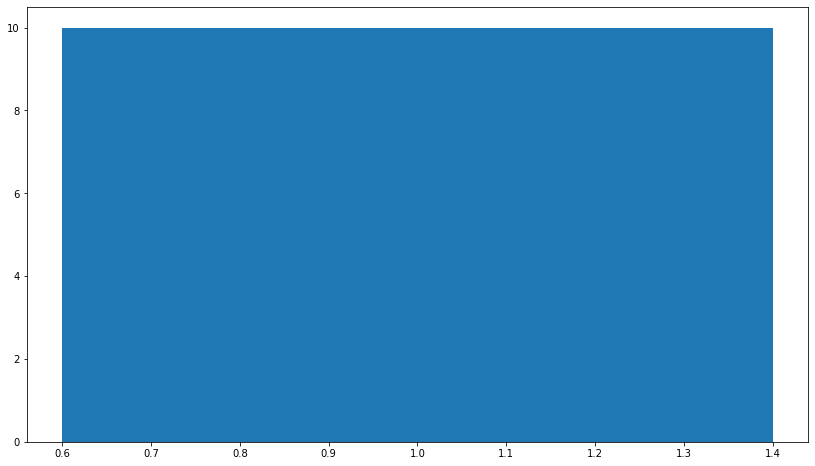

In [ ]:
#plt.bar(YFRAUDE , height=10)


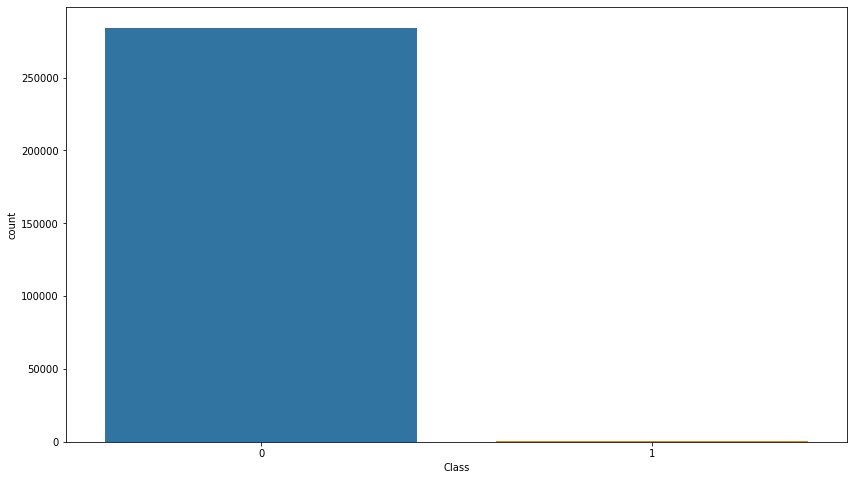

In [ ]:
sns.countplot(x ='Class', data = df)

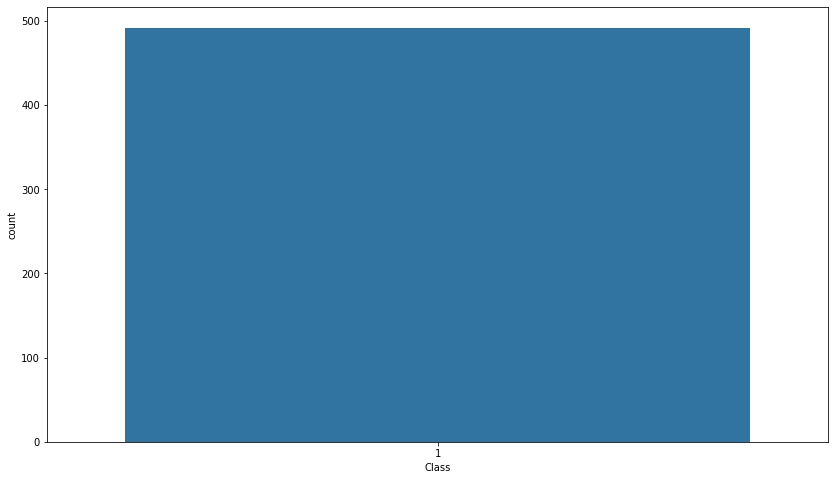

In [ ]:
sns.countplot(x ='Class', data = fraud)

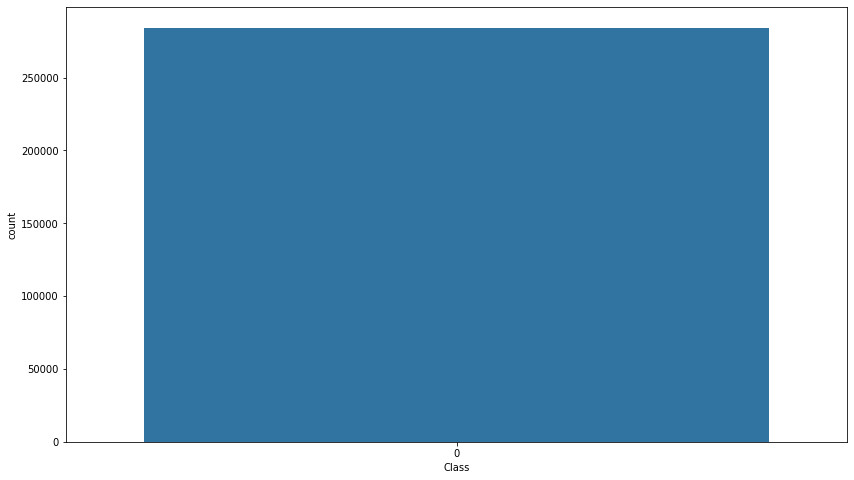

In [ ]:
sns.countplot(x ='Class', data = normal)

In [ ]:

#plt.show(fraud)

In [ ]:
#Y.plot.bar(figsize =(15,3))

In [ ]:
#sns.countplot(x = feature_colonnes, data = df)

In [ ]:
type(feature_colonnes)

list



---

# IMBALANCED DATASET ( Donnees brutes )

In [ ]:
X = df.drop(columns=['Time','Amount','Class'], axis=1)
Y = df['Class']
#Split

In [ ]:
X_train_IMBALANCED , X_test_IMBALANCED , Y_train_IMBALANCED , Y_test_IMBALANCED = train_test_split(X , Y, test_size=0.3 , stratify=Y , random_state=2)

print("X = " ,X.shape )
print("X_train = " ,X_train_IMBALANCED.shape)
print("X_test = " , X_test_IMBALANCED.shape)
print("    ")
print("Y = " ,Y.shape )
print("Y_train =" ,Y_train_IMBALANCED.shape)
print("Y_test =" ,Y_test_IMBALANCED.shape )


X =  (284807, 28)
X_train =  (199364, 28)
X_test =  (85443, 28)
    
Y =  (284807,)
Y_train = (199364,)
Y_test = (85443,)


In [ ]:
np.bincount(Y)

array([284315,    492])



---

# LR sur les données brutes

In [ ]:
# LR SUR DONNEES BRUTES
model = LogisticRegression(max_iter=len(df))
model.fit(X_train_IMBALANCED , Y_train_IMBALANCED)
X_train_prediction_IMB=model.predict(X_train_IMBALANCED)
training_data_accuracy = accuracy_score(X_train_prediction_IMB, Y_train_IMBALANCED)
print('Accuracy on training data =' , training_data_accuracy )
X_test_prediction_IMB=model.predict(X_test_IMBALANCED)
testing_data_accuracy = accuracy_score(X_test_prediction_IMB, Y_test_IMBALANCED)
print('Accuracy on testing data =' , testing_data_accuracy )

Accuracy on training data = 0.9991222086234225
Accuracy on testing data = 0.9993211848834895


In [ ]:
LR_auroc=roc_auc_score(Y_test_IMBALANCED,X_test_prediction_IMB)
precision_test=precision_score(Y_test_IMBALANCED,X_test_prediction_IMB)
recall_test=recall_score(Y_test_IMBALANCED,X_test_prediction_IMB)
SCOREF1_test=f1_score(Y_test_IMBALANCED,X_test_prediction_IMB)
print(" SCORE DE PRECISION test : {} " .format(precision_test) )
print(" Recall Score test :{} " .format(recall_test) )
print(" F1-Score test : {}" .format(SCOREF1_test) )
print("LR Auroc : {} " .format(LR_auroc))

 SCORE DE PRECISION test : 0.9166666666666666 
 Recall Score test :0.668918918918919 
 F1-Score test : 0.7734375
LR Auroc : 0.834406701384543 


In [ ]:
ConfMat=confusion_matrix(Y_test_IMBALANCED,X_test_prediction_IMB)
print("Confusion matrix LR sur données brute : ")
print(ConfMat)
print(classification_report(Y_test_IMBALANCED,X_test_prediction_IMB))

Confusion matrix LR sur données brute : 
[[85286     9]
 [   49    99]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.67      0.77       148

    accuracy                           1.00     85443
   macro avg       0.96      0.83      0.89     85443
weighted avg       1.00      1.00      1.00     85443



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


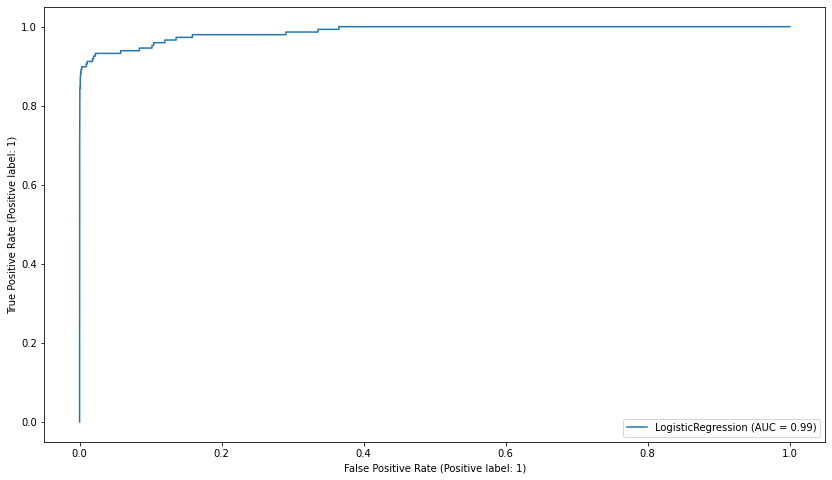

In [ ]:
plot_roc_curve(model , X_test_IMBALANCED , Y_test_IMBALANCED)



---

# RF sur données brutes

In [ ]:
RF=RandomForestClassifier()
RF.fit(X_train_IMBALANCED , Y_train_IMBALANCED)
RandFor_Predict=RF.predict(X_train_IMBALANCED)
RandFor_Predict_TEST=RF.predict(X_test_IMBALANCED)
print( "Accuracy on training set :" , RF.score(X_train_IMBALANCED,Y_train_IMBALANCED))
print( "Accuracy on testing set :" , RF.score(X_test_IMBALANCED ,Y_test_IMBALANCED))

Accuracy on training set : 1.0
Accuracy on testing set : 0.9995318516437859


In [ ]:
precision_RF_=precision_score(Y_test_IMBALANCED,RandFor_Predict_TEST)
recall_RF_=recall_score(Y_test_IMBALANCED,RandFor_Predict_TEST)
SCOREF1_RF_=f1_score(Y_test_IMBALANCED,RandFor_Predict_TEST)
print(" SCORE DE PRECISION  : {} " .format(precision_RF_) )
print(" Recall Score  :{} " .format(recall_RF_) )
print(" F1-Score  : {}" .format(SCOREF1_RF_) )

 SCORE DE PRECISION  : 0.9090909090909091 
 Recall Score  :0.8108108108108109 
 F1-Score  : 0.8571428571428571


In [ ]:
print("Matrice de confusion de RANDOM FOREST SUR Donnees brute : " )
print(confusion_matrix(Y_test_IMBALANCED,RandFor_Predict_TEST))
print(classification_report(Y_test_IMBALANCED,RandFor_Predict_TEST))

Matrice de confusion de RANDOM FOREST SUR Donnees brute : 
[[85283    12]
 [   28   120]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.91      0.81      0.86       148

    accuracy                           1.00     85443
   macro avg       0.95      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


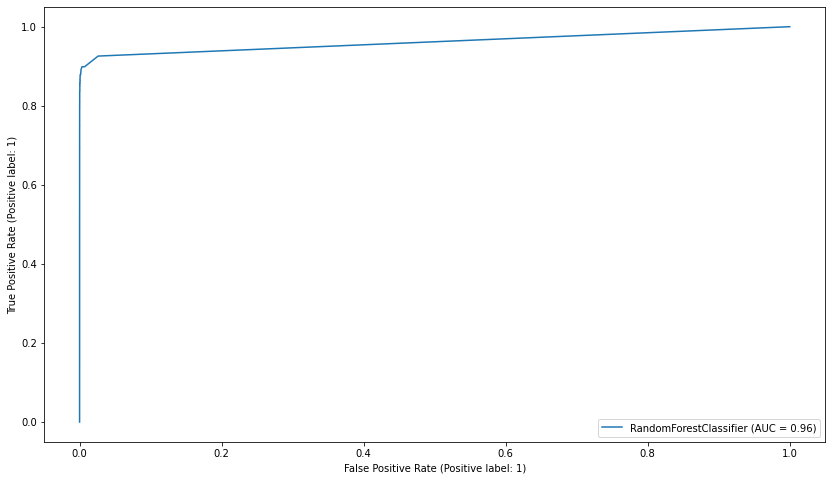

In [ ]:
plot_roc_curve(RF , X_test_IMBALANCED , Y_test_IMBALANCED )



---

# SVM sur données brutes

In [ ]:
SVM_IMB=SVC()
SVM_IMB.fit(X_train_IMBALANCED , Y_train_IMBALANCED)
print( "Accuracy on training set :" , SVM_IMB.score(X_train_IMBALANCED , Y_train_IMBALANCED))
print( "Accuracy on testing set :" , SVM_IMB.score(X_test_IMBALANCED , Y_test_IMBALANCED))


Accuracy on training set : 0.9996388515479224
Accuracy on testing set : 0.9993562960102056


In [ ]:
X_test_predict_SVM=SVM_IMB.predict(X_test_IMBALANCED)
print("Matrice de confusion DE SVM SUR MA METHODE KMEANS SMOTE : " )
print(confusion_matrix(Y_test_IMBALANCED , X_test_predict_SVM))
print(classification_report(Y_test_IMBALANCED , X_test_predict_SVM))

Matrice de confusion DE SVM SUR MA METHODE KMEANS SMOTE : 
[[85286     9]
 [   46   102]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.69      0.79       148

    accuracy                           1.00     85443
   macro avg       0.96      0.84      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
precision_SVM_=precision_score(Y_test_IMBALANCED , X_test_predict_SVM)
recall_SVM_=recall_score(Y_test_IMBALANCED , X_test_predict_SVM)
SCOREF1_SVM_=f1_score(Y_test_IMBALANCED , X_test_predict_SVM)
print(" SCORE DE PRECISION  : {} " .format(precision_SVM_) )
print(" Recall Score  :{} " .format(recall_SVM_) )
print(" F1-Score  : {}" .format(SCOREF1_SVM_) )

 SCORE DE PRECISION  : 0.918918918918919 
 Recall Score  :0.6891891891891891 
 F1-Score  : 0.7876447876447876


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


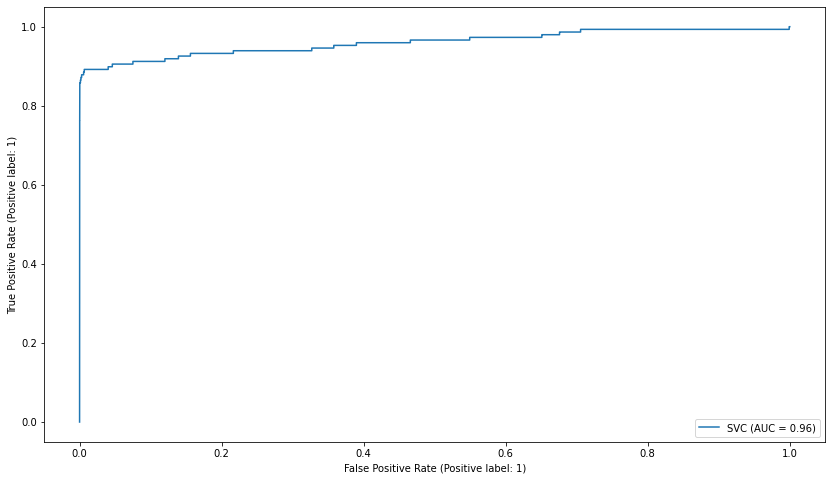

In [ ]:
plot_roc_curve(SVM_IMB , X_test_IMBALANCED , Y_test_IMBALANCED )

*Les courbes AUC des classificateurs sur données brutes

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

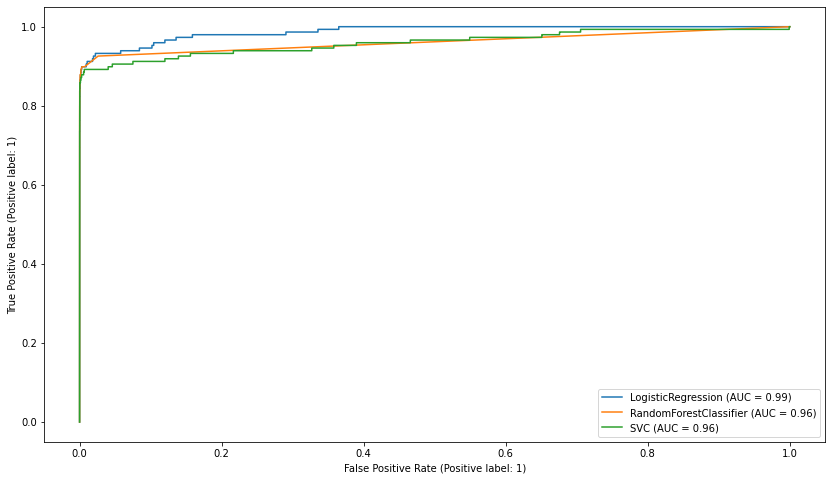

In [ ]:
graphe_DB = plot_roc_curve(model , X_test_IMBALANCED , Y_test_IMBALANCED )
plot_roc_curve(RF , X_test_IMBALANCED , Y_test_IMBALANCED , ax=graphe_DB.ax_)
plot_roc_curve(SVM_IMB , X_test_IMBALANCED , Y_test_IMBALANCED , ax=graphe_DB.ax_)

# RANDOM OVERSAMPLING



---

# Smote sur le dataset

In [ ]:
Smote_OS=SMOTE()
X_ROS , Y_ROS = Smote_OS.fit_resample(X ,Y )

In [ ]:
np.bincount(Y)

array([284315,    492])

In [ ]:
np.bincount(Y_ROS)

array([284315, 284315])

In [ ]:
X_train_Smote_OS , X_test_Smote_OS , Y_train_Smote_OS , Y_test_Smote_OS = train_test_split(X_ROS , Y_ROS , test_size=0.3 ,  random_state=2)

In [ ]:
print("X = " ,X_ROS.shape )
print("X_train = " ,X_train_Smote_OS.shape)
print("X_test = " , X_test_Smote_OS.shape)
print("    ")
print("Y = " ,Y_ROS.shape )
print("Y_train =" ,Y_train_Smote_OS.shape)
print("Y_test =" ,Y_test_Smote_OS.shape )

X =  (568630, 28)
X_train =  (398041, 28)
X_test =  (170589, 28)
    
Y =  (568630,)
Y_train = (398041,)
Y_test = (170589,)




---

# LR Smote

In [ ]:
# LR SUR SMOTE
LR_SMOTE = LogisticRegression(max_iter=len(df))
LR_SMOTE.fit(X_train_Smote_OS , Y_train_Smote_OS)
X_train_prediction_OS_SMOTE=LR_SMOTE.predict(X_train_Smote_OS)
training_data_accuracy = accuracy_score(X_train_prediction_OS_SMOTE, Y_train_Smote_OS)
print('Accuracy on training data =' , training_data_accuracy )
X_test_prediction_OS_SMOTE=LR_SMOTE.predict(X_test_Smote_OS)
testing_data_accuracy = accuracy_score(X_test_prediction_OS_SMOTE, Y_test_Smote_OS)
print('Accuracy on testing data =' , testing_data_accuracy )

Accuracy on training data = 0.9440535020261732
Accuracy on testing data = 0.9444043871527472


In [ ]:
LR_auroc_SMOTE=roc_auc_score(Y_test_Smote_OS,X_test_prediction_OS_SMOTE)
precision_test_SMOTE=precision_score(Y_test_Smote_OS,X_test_prediction_OS_SMOTE)
recall_test_SMOTE=recall_score(Y_test_Smote_OS,X_test_prediction_OS_SMOTE)
SCOREF1_test_SMOTE=f1_score(Y_test_Smote_OS,X_test_prediction_OS_SMOTE)
print(" SCORE DE PRECISION test : {} " .format(precision_test_SMOTE) )
print(" Recall Score test :{} " .format(recall_test_SMOTE) )
print(" F1-Score test : {}" .format(SCOREF1_test_SMOTE) )
print("LR Auroc : {} " .format(LR_auroc_SMOTE))

 SCORE DE PRECISION test : 0.9733086582291058 
 Recall Score test :0.9154245128732302 
 F1-Score test : 0.9434795957066405
LR Auroc : 0.9450688487764399 


In [ ]:
ConfMat=confusion_matrix(Y_test_Smote_OS,X_test_prediction_OS_SMOTE)
print("Confusion matrix LR sur SMOTE : ")
print(ConfMat)
print(classification_report(Y_test_Smote_OS,X_test_prediction_OS_SMOTE))

Confusion matrix LR sur SMOTE : 
[[82836  2149]
 [ 7240 78364]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     84985
           1       0.97      0.92      0.94     85604

    accuracy                           0.94    170589
   macro avg       0.95      0.95      0.94    170589
weighted avg       0.95      0.94      0.94    170589



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


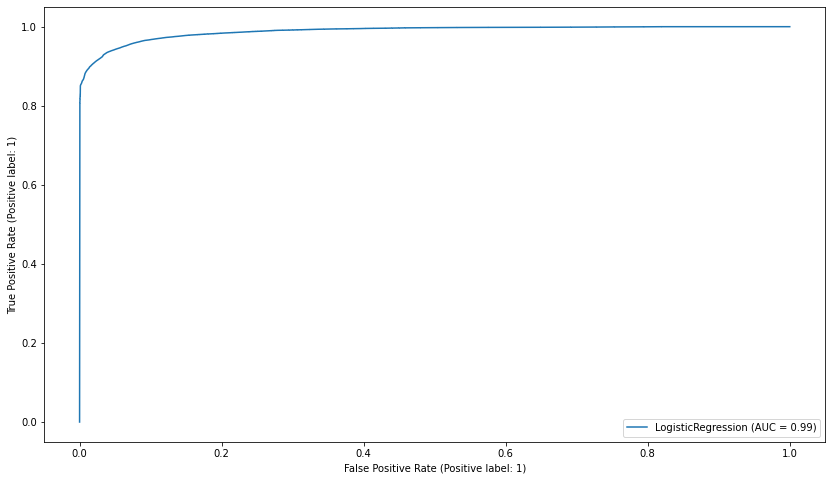

In [ ]:
plot_roc_curve(LR_SMOTE , X_test_Smote_OS , Y_test_Smote_OS)



---

# RF Smote

In [ ]:
RF_SMOTE=RandomForestClassifier()
RF_SMOTE.fit(X_train_Smote_OS , Y_train_Smote_OS)
RandFor_Predict_train_smote=RF_SMOTE.predict(X_train_Smote_OS)
RandFor_Predict_TEST_SMOTE=RF_SMOTE.predict(X_test_Smote_OS)
print( "Accuracy on training set :" , RF_SMOTE.score(X_train_Smote_OS,Y_train_Smote_OS))
print( "Accuracy on testing set :" , RF_SMOTE.score(X_test_Smote_OS ,Y_test_Smote_OS))

Accuracy on training set : 1.0
Accuracy on testing set : 0.9998593109755025


In [ ]:
print( "Accuracy on training set :" , RF_SMOTE.score(X_train_Smote_OS,Y_train_Smote_OS))
print( "Accuracy on testing set :" , RF_SMOTE.score(X_test_Smote_OS ,Y_test_Smote_OS))

Accuracy on training set : 1.0
Accuracy on testing set : 0.9998768971035648


In [ ]:
precision_RF_SMOTE=precision_score(Y_test_Smote_OS,RandFor_Predict_TEST_SMOTE)
recall_RF_SMOTE=recall_score(Y_test_Smote_OS,RandFor_Predict_TEST_SMOTE)
SCOREF1_RF_SMOTE=f1_score(Y_test_Smote_OS,RandFor_Predict_TEST_SMOTE)
print(" SCORE DE PRECISION  : {} " .format(precision_RF_SMOTE) )
print(" Recall Score  :{} " .format(recall_RF_SMOTE) )
print(" F1-Score  : {}" .format(SCOREF1_RF_SMOTE) )

 SCORE DE PRECISION  : 0.9997547445255475 
 Recall Score  :1.0 
 F1-Score  : 0.9998773572233676


In [ ]:
print("Matrice de confusion de RANDOM FOREST SUR Donnees brute : " )
print(confusion_matrix(Y_test_Smote_OS,RandFor_Predict_TEST_SMOTE))
print(classification_report(Y_test_Smote_OS,RandFor_Predict_TEST_SMOTE))

Matrice de confusion de RANDOM FOREST SUR Donnees brute : 
[[84964    21]
 [    0 85604]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84985
           1       1.00      1.00      1.00     85604

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


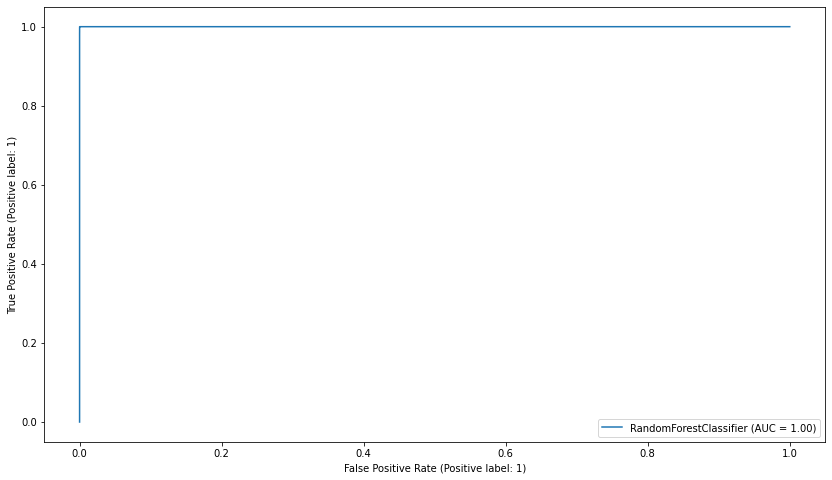

In [ ]:
plot_roc_curve(RF_SMOTE , X_test_Smote_OS , Y_test_Smote_OS )



---

# SVM Smote

In [ ]:
SVM_SMOTE=SVC()
SVM_SMOTE.fit(X_train_Smote_OS , Y_train_Smote_OS)

In [ ]:
print( "Accuracy on training set :" , SVM_SMOTE.score(X_train_Smote_OS , Y_train_Smote_OS))

Accuracy on training set : 0.9782057627229356


In [ ]:
print( "Accuracy on testing set :" , SVM_SMOTE.score(X_test_Smote_OS , Y_test_Smote_OS))

Accuracy on testing set : 0.9784100967823248


In [ ]:
X_test_predict_SVM_SMOTE=SVM_SMOTE.predict(X_test_Smote_OS)
print("Matrice de confusion DE SVM SUR MA METHODE KMEANS SMOTE : " )
print(confusion_matrix(Y_test_Smote_OS , X_test_predict_SVM_SMOTE))
print(classification_report(Y_test_Smote_OS , X_test_predict_SVM_SMOTE))

Matrice de confusion DE SVM SUR MA METHODE KMEANS SMOTE : 
[[83556  1429]
 [ 2254 83350]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     84985
           1       0.98      0.97      0.98     85604

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589



In [ ]:
precision_SVM_SMOTE=precision_score(Y_test_Smote_OS , X_test_predict_SVM_SMOTE)
recall_SVM_SMOTE=recall_score(Y_test_Smote_OS , X_test_predict_SVM_SMOTE)
SCOREF1_SVM_SMOTE=f1_score(Y_test_Smote_OS , X_test_predict_SVM_SMOTE)
print(" SCORE DE PRECISION  : {} " .format(precision_SVM_SMOTE) )
print(" Recall Score  :{} " .format(recall_SVM_SMOTE) )
print(" F1-Score  : {}" .format(SCOREF1_SVM_SMOTE) )

 SCORE DE PRECISION  : 0.9831444107620991 
 Recall Score  :0.9736694546983786 
 F1-Score  : 0.9783839937082924


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


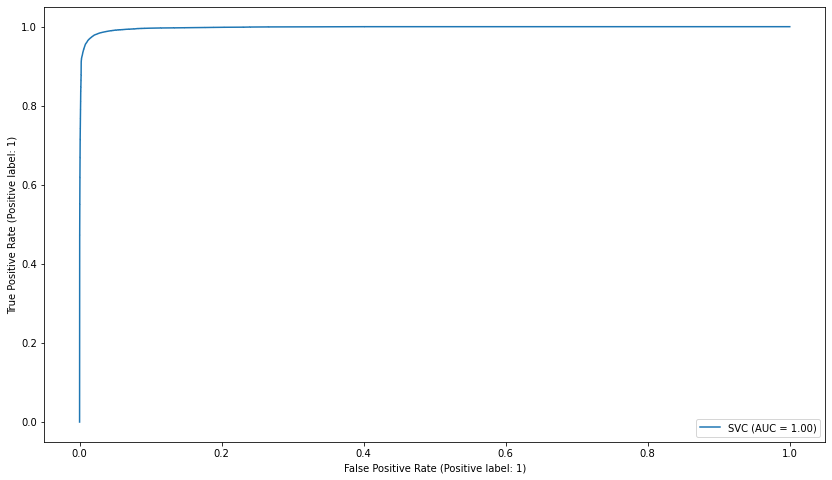

In [ ]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(SVM_SMOTE , X_test_Smote_OS , Y_test_Smote_OS )

*Les courbes des classifieurs sur Smote Dans le meme graphe*

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

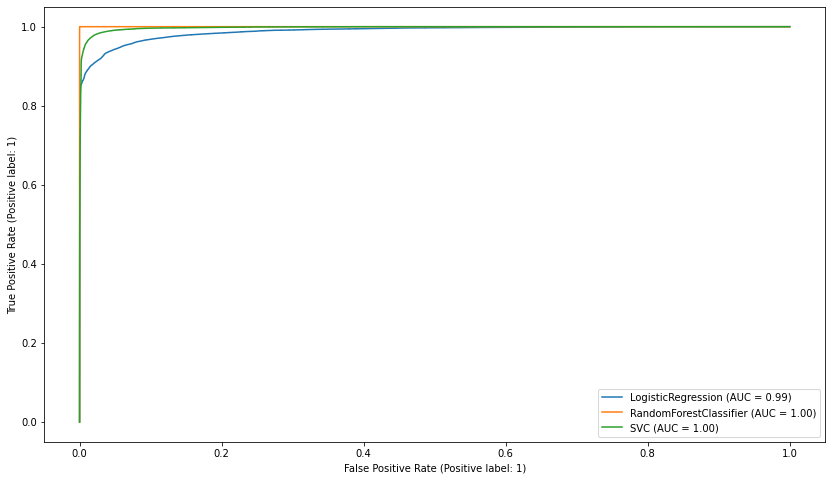

In [ ]:
graphe_SMOTE = plot_roc_curve(LR_SMOTE , X_test_Smote_OS , Y_test_Smote_OS)
plot_roc_curve(RF_SMOTE , X_test_Smote_OS , Y_test_Smote_OS , ax=graphe_SMOTE.ax_);
plot_roc_curve(SVM_SMOTE , X_test_Smote_OS , Y_test_Smote_OS , ax=graphe_SMOTE.ax_)



---

# Adasyn sur le dataset

In [ ]:
ada = ADASYN(random_state=42)
X_ROS_ADASYN , Y_ROS_ADASYN = ada.fit_resample(X , Y )
print('Resampled X ET Y dataset shape %s' % Counter(Y_ROS_ADASYN))

COUNT_Y_ADASYN= np.bincount(Y)
print("le calcule de Y avant adasyn:" , COUNT_Y_ADASYN )
COUNT_Y_AFTER_ADASYN= np.bincount(Y_ROS_ADASYN)
print("le calcule de Y après adasyn:" , COUNT_Y_AFTER_ADASYN )
X_train_ADASYN , X_test_ADASYN , Y_train_ADASYN , Y_test_ADASYN = train_test_split(X_ROS_ADASYN , Y_ROS_ADASYN , test_size=0.3  , random_state=2)

Resampled X ET Y dataset shape Counter({0: 284315, 1: 284300})
le calcule de Y avant adasyn: [284315    492]
le calcule de Y après adasyn: [284315 284300]




---

# LR ADASYN

In [ ]:
LR_ADASYN = LogisticRegression(max_iter=len(df))
LR_ADASYN.fit(X_train_ADASYN , Y_train_ADASYN)

LogisticRegression(max_iter=284807)

In [ ]:
LR_ADASYN = LogisticRegression(max_iter=len(df))
LR_ADASYN.fit(X_train_ADASYN , Y_train_ADASYN)
X_train_prediction_ADASYN=LR_ADASYN.predict(X_train_ADASYN)
training_data_accuracy = accuracy_score(X_train_prediction_ADASYN, Y_train_ADASYN)
print('Accuracy on training data =' , training_data_accuracy )
X_test_prediction_ADASYN=LR_ADASYN.predict(X_test_ADASYN)
testing_data_accuracy = accuracy_score(X_test_prediction_ADASYN, Y_test_ADASYN)
print('Accuracy on testing data =' , testing_data_accuracy )

Accuracy on training data = 0.8821847599427178
Accuracy on testing data = 0.879338746079667


In [ ]:
ConfMat=confusion_matrix(Y_test_ADASYN , X_test_prediction_ADASYN)
print("Confusion matrix : ")
print(ConfMat)
print(classification_report(Y_test_ADASYN , X_test_prediction_ADASYN))

Confusion matrix : 
[[76567  8399]
 [12184 73435]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     84966
           1       0.90      0.86      0.88     85619

    accuracy                           0.88    170585
   macro avg       0.88      0.88      0.88    170585
weighted avg       0.88      0.88      0.88    170585



In [ ]:
LR_ADASYN_auroc=roc_auc_score(Y_test_ADASYN , X_test_prediction_ADASYN)
precision_test_adasyn=precision_score(Y_test_ADASYN , X_test_prediction_ADASYN)
recall_test_adasyn=recall_score(Y_test_ADASYN , X_test_prediction_ADASYN)
SCOREF1_test_adasyn=f1_score(Y_test_ADASYN , X_test_prediction_ADASYN)
print(" SCORE DE PRECISION test : {} " .format(precision_test_adasyn) )
print(" Recall Score test :{} " .format(recall_test_adasyn) )
print(" F1-Score test : {}" .format(SCOREF1_test_adasyn) )
print("LR Auroc : {} " .format(LR_ADASYN_auroc))

 SCORE DE PRECISION test : 0.8973653982452281 
 Recall Score test :0.8576951377614782 
 F1-Score test : 0.8770819274662143
LR Auroc : 0.8794219162667524 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


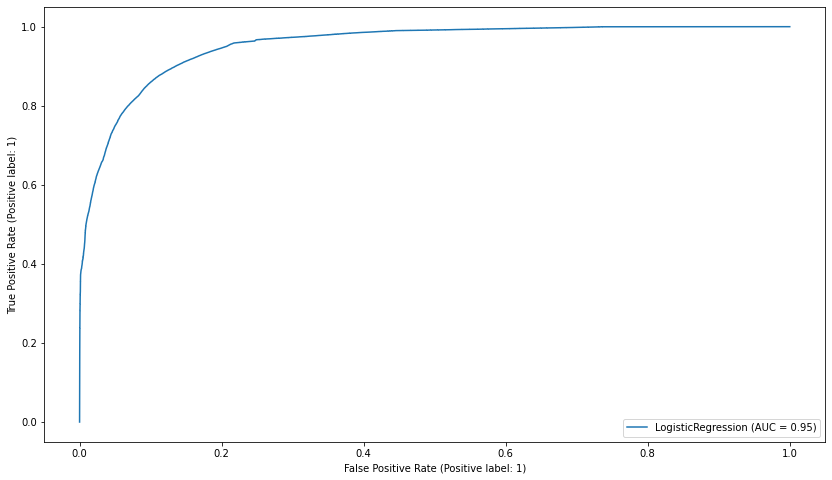

In [ ]:
plot_roc_curve(LR_ADASYN , X_test_ADASYN , Y_test_ADASYN)



---
# RF ADASYN


In [ ]:
RF_ADASYN=RandomForestClassifier()
RF_ADASYN.fit(X_train_ADASYN , Y_train_ADASYN)

RandomForestClassifier()

In [ ]:
RF_ADASYN=RandomForestClassifier()
RF_ADASYN.fit(X_train_ADASYN , Y_train_ADASYN)
RandForADASYN_Predict=RF_ADASYN.predict(X_train_ADASYN)
RandFor_AD_Predict_TEST=RF_ADASYN.predict(X_test_ADASYN)
print( "Accuracy on training set :" , RF_ADASYN.score(X_train_ADASYN , Y_train_ADASYN))
print( "Accuracy on testing set :" , RF_ADASYN.score(X_test_ADASYN , Y_test_ADASYN))

Accuracy on training set : 1.0
Accuracy on testing set : 0.9998593076765249


In [ ]:
print("Matrice de confusion de RANDOM FOREST SUR LA ADASYN : " )
print(confusion_matrix(Y_test_ADASYN,RandFor_AD_Predict_TEST))
print(classification_report(Y_test_ADASYN,RandFor_AD_Predict_TEST))

Matrice de confusion de RANDOM FOREST SUR LA ADASYN : 
[[84942    24]
 [    0 85619]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84966
           1       1.00      1.00      1.00     85619

    accuracy                           1.00    170585
   macro avg       1.00      1.00      1.00    170585
weighted avg       1.00      1.00      1.00    170585



In [ ]:
precision_RF_AD=precision_score(Y_test_ADASYN,RandFor_AD_Predict_TEST)
recall_RF_AD=recall_score(Y_test_ADASYN,RandFor_AD_Predict_TEST)
SCOREF1_RF_AD=f1_score(Y_test_ADASYN,RandFor_AD_Predict_TEST)
print(" SCORE DE PRECISION  : {} " .format(precision_RF_AD) )
print(" Recall Score  :{} " .format(recall_RF_AD) )
print(" F1-Score  : {}" .format(SCOREF1_RF_AD) )

 SCORE DE PRECISION  : 0.9997197669395047 
 Recall Score  :1.0 
 F1-Score  : 0.9998598638343591


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


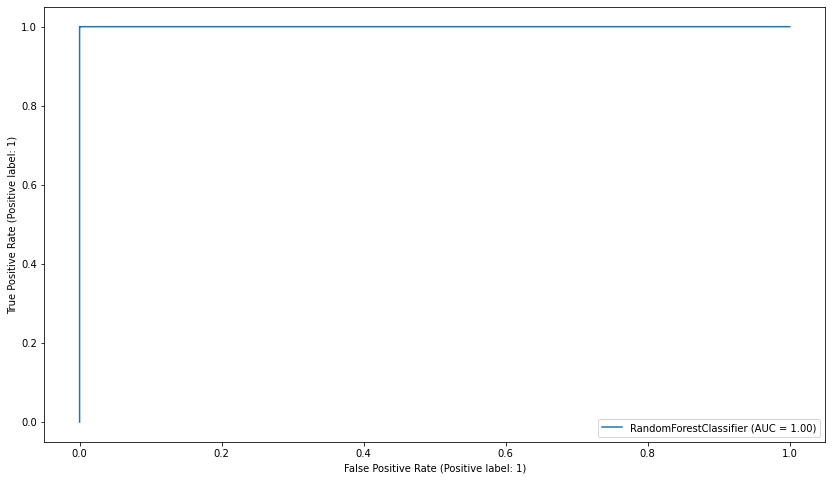

In [ ]:
plot_roc_curve(RF_ADASYN , X_test_ADASYN , Y_test_ADASYN )



---

# SVM ADASYN

In [ ]:
SVM_ADASYN=SVC()
SVM_ADASYN.fit(X_train_ADASYN , Y_train_ADASYN)


SVC()

In [ ]:
print( "Accuracy on training set :" , SVM_ADASYN.score(X_train_ADASYN , Y_train_ADASYN))
print( "Accuracy on testing set :" ,  SVM_ADASYN.score(X_test_ADASYN, Y_test_ADASYN))

Accuracy on training set : 0.99077958947818
Accuracy on testing set : 0.9901398129964534


In [ ]:
X_test_predict_SVM_AD=SVM_ADASYN.predict(X_test_ADASYN)

In [ ]:
#X_test_predict_SVM_AD=SVM_ADASYN.predict(X_test_ADASYN)
print("Matrice de confusion DE SVM SUR LA METHODE ADASYN : " )
print(confusion_matrix(Y_test_ADASYN , X_test_predict_SVM_AD))
print(classification_report(Y_test_ADASYN , X_test_predict_SVM_AD))

Matrice de confusion DE SVM SUR LA METHODE ADASYN : 
[[83365  1601]
 [   81 85538]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84966
           1       0.98      1.00      0.99     85619

    accuracy                           0.99    170585
   macro avg       0.99      0.99      0.99    170585
weighted avg       0.99      0.99      0.99    170585



In [ ]:
SVM_ADASYN_auroc=roc_auc_score(Y_test_ADASYN , X_test_predict_SVM_AD)
print("SVM Auroc : {} " .format(SVM_ADASYN_auroc))
precision_SVM_AD=precision_score(Y_test_ADASYN , X_test_predict_SVM_AD)
recall_SVM_AD=recall_score(Y_test_ADASYN , X_test_predict_SVM_AD)
SCOREF1_SVM_AD=f1_score(Y_test_ADASYN , X_test_predict_SVM_AD)
print(" SCORE DE PRECISION  : {} " .format(precision_SVM_AD) )
print(" Recall Score  :{} " .format(recall_SVM_AD) )
print(" F1-Score  : {}" .format(SCOREF1_SVM_AD) )

SVM Auroc : 0.9901055585278598 
 SCORE DE PRECISION  : 0.9816270556237735 
 Recall Score  :0.9990539483058667 
 F1-Score  : 0.9902638372752636


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


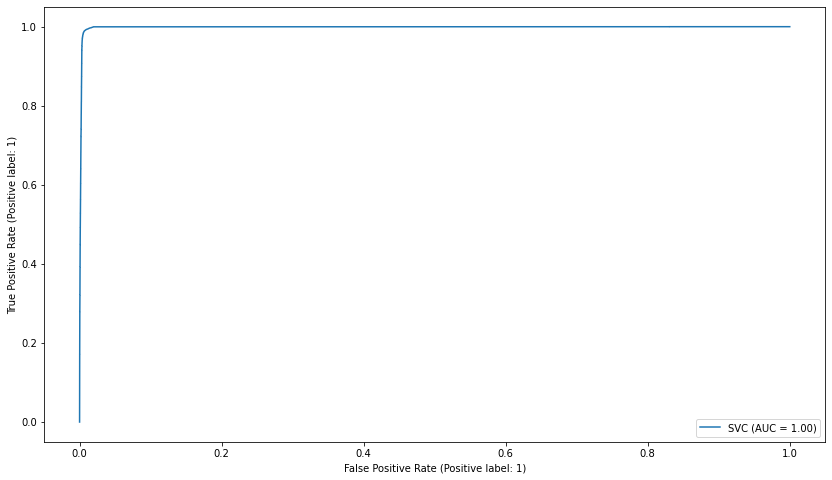

In [ ]:
plot_roc_curve(SVM_ADASYN, X_test_ADASYN , Y_test_ADASYN )

*Les courbes AUC des classifieurs avec adasyn*

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

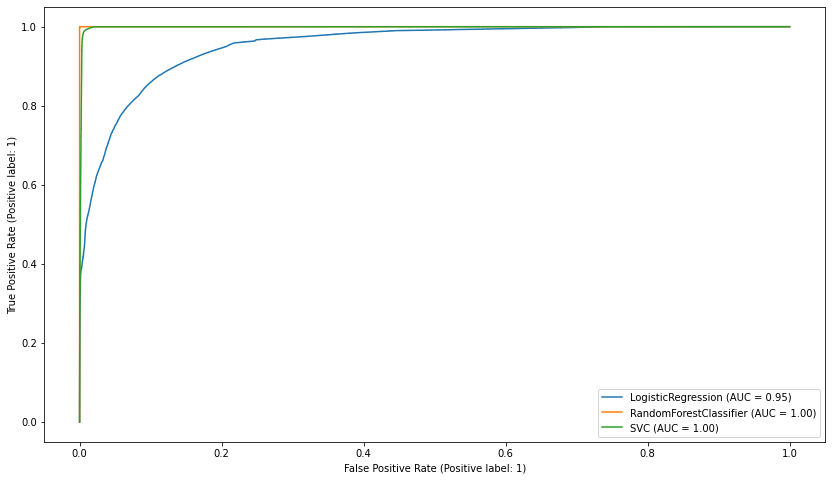

In [ ]:
Affichage = plot_roc_curve(LR_ADASYN , X_test_ADASYN , Y_test_ADASYN)
plot_roc_curve(RF_ADASYN , X_test_ADASYN , Y_test_ADASYN , ax= Affichage.ax_ ) ;
plot_roc_curve(SVM_ADASYN, X_test_ADASYN , Y_test_ADASYN , ax= Affichage.ax_)



---
# **MA METHODE DE KMEANS SMOTE**

---




# **Preparation des données pour l'application de l'approche**

# TESTER_LES_K_DE_KMEANS

In [ ]:

feature_colonnes=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
#df_clustering=fraud['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
#XSCRSIL=df[fraud].values
XSCORESILHOUETTE = fraud.drop(columns=['Time','Amount','Class'], axis=1)

YSCORESILHOUETTE=fraud.values



In [ ]:
kmeansK4 = KMeans (n_clusters=4)
kmeansK4.fit(XSCORESILHOUETTE)
kmeansK4.fit_predict(XSCORESILHOUETTE)
labels=kmeansK4.labels_

silhouette_score(XSCORESILHOUETTE,labels)

0.562785152307267

In [ ]:
DATAFRAME_XSCORESILOUHETTE=pd.DataFrame(XSCORESILHOUETTE)

In [ ]:
XSCORESILHOUETTE

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700


In [ ]:
type(XSCORESILHOUETTE)

pandas.core.frame.DataFrame

In [ ]:
type(XFRAUDE)

pandas.core.frame.DataFrame

In [ ]:
#sns.scatterplot(data=XSCORESILHOUETTE)

In [ ]:
kmeansK2 = KMeans(n_clusters=2)
kmeansK2.fit(XSCORESILHOUETTE)
Cluster_LabelK2=kmeansK2.fit_predict(XSCORESILHOUETTE)
silhouette_score(XSCORESILHOUETTE,kmeansK2.labels_)

0.5517795741982902

In [ ]:
kmeansK= KMeans(n_clusters=3 )
kmeansK.fit(XSCORESILHOUETTE)
Cluster_LabelESSAI=kmeansK.fit_predict(XSCORESILHOUETTE)
silhouette_score(XSCORESILHOUETTE,kmeansK.labels_)

0.5604905020867837

In [ ]:
LABELS_OF_KMEANS_3=kmeansK.labels_

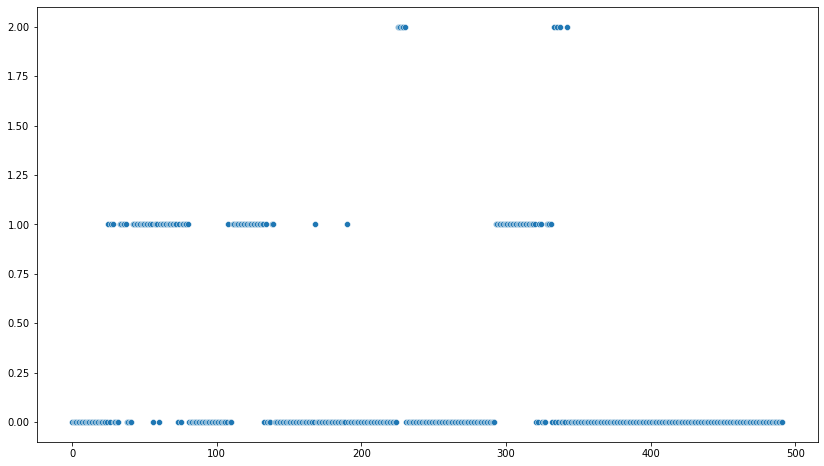

In [ ]:
sns.scatterplot(data=LABELS_OF_KMEANS_3 )

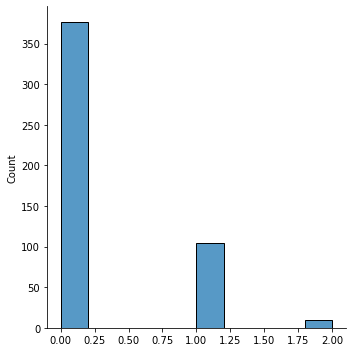

In [ ]:
sns.displot(data=LABELS_OF_KMEANS_3)

(array([377.,   0.,   0.,   0.,   0., 105.,   0.,   0.,   0.,  10.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

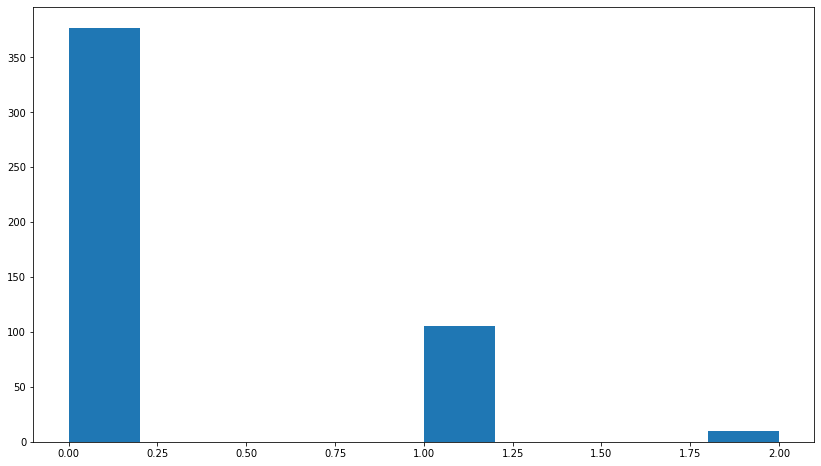

In [ ]:
plt.hist(LABELS_OF_KMEANS_3)

In [ ]:
pd.crosstab(LABELS_OF_KMEANS_3 , YFRAUDE , rownames=['Clusters'] , colnames=['Classes'])

Classes,1
Clusters,
0,377
1,105
2,10


In [ ]:
RATIO_CLUSTER = (100/3)
RATIO_CLUSTER

33.333333333333336

In [ ]:
#print(LABELS_OF_KMEANS_3)

In [ ]:
#XSCORESILHOUETTE_CORRECT=fraud.drop(columns=['Time','Class','Amount'], axis=1)


In [ ]:
#XSCORESILHOUETTE_CORRECT

In [ ]:
XSCORESILHOUETTE

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700


In [ ]:
#XSCORESILHOUETTE_DATAFRAME=pd.DataFrame(XSCORESILHOUETTE)

In [ ]:
#DATAFRAME_XSCORESILOUHETTE.head()

In [ ]:
clusters_df = pd.DataFrame()
clusters_df['valeurs'] = XSCORESILHOUETTE.index.values
clusters_df['cluster'] = LABELS_OF_KMEANS_3

In [ ]:
clusters_df

,valeurs,cluster
0,541,0
1,623,0
2,4920,0
3,6108,0
4,6329,0
...,...,...
487,279863,0
488,280143,0
489,280149,0
490,281144,0


In [ ]:
CLUSTER1= clusters_df[clusters_df.cluster == 0]
CLUSTER2= clusters_df[clusters_df.cluster == 1]
CLUSTER3= clusters_df[clusters_df.cluster == 2]

In [ ]:
CLUSTER1.head()

,valeurs,cluster
0,541,0
1,623,0
2,4920,0
3,6108,0
4,6329,0


In [ ]:
type(CLUSTER1.valeurs)

pandas.core.series.Series

In [ ]:
type(CLUSTER1.cluster)

pandas.core.series.Series

In [ ]:
DATAPOINTS_OF_CLUSTER1= CLUSTER1.loc[:, 'valeurs'].values
DATAPOINTS_OF_CLUSTER2= CLUSTER2.loc[:, 'valeurs'].values
DATAPOINTS_OF_CLUSTER3= CLUSTER3.loc[:, 'valeurs'].values

In [ ]:
len(DATAPOINTS_OF_CLUSTER1)

377

In [ ]:
len(DATAPOINTS_OF_CLUSTER2)

105

In [ ]:
len(DATAPOINTS_OF_CLUSTER3)

10

In [ ]:
#DATAPOINTS_OF_CLUSTER1

In [ ]:
df.iloc[DATAPOINTS_OF_CLUSTER1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
X_CORRECT = df.drop(columns=['Time','Amount'], axis=1)
Y_CORRECT = df['Class']
#Split

In [ ]:
X_CORRECT.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
len(X_CORRECT)

284807

In [ ]:
Y_CORRECT

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [ ]:
DATAFRAME_OF_FRAUDE=X_CORRECT.loc[X_CORRECT['Class'] == 1]

In [ ]:
DATAFRAME_OF_FRAUDE.shape

(492, 29)

In [ ]:
DATAFRAME_OF_NORMAL=X_CORRECT.loc[X_CORRECT['Class'] == 0]


In [ ]:
DATAFRAME_OF_NORMAL.shape

(284315, 29)

In [ ]:
AUG_CLUSTER_1 = DATAFRAME_OF_NORMAL.iloc[:217088]

In [ ]:
AUG_CLUSTER_2 = DATAFRAME_OF_NORMAL.iloc[:60462]

In [ ]:
AUG_CLUSTER_3 = DATAFRAME_OF_NORMAL.iloc[:5751]

In [ ]:
print(' ', AUG_CLUSTER_1.shape)
print(' ', AUG_CLUSTER_2.shape)
print(' ', AUG_CLUSTER_3.shape)

  (217088, 29)
  (60462, 29)
  (5751, 29)


In [ ]:
 DATAFRAME_OF_NORMAL

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


In [ ]:
DATAFRAME_OF_CLUSTER1= X_CORRECT.iloc[DATAPOINTS_OF_CLUSTER1]

In [ ]:
DATAFRAME_OF_CLUSTER1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,1


In [ ]:
#df['column name'] = df['column name'].replace(['old value'],'new value')
#DATAFRAME_OF_CLUSTER1['Class']=DATAFRAME_OF_CLUSTER1['Class'].replace(to_replace=0 , value = 1 )

In [ ]:
DATAFRAME_OF_CLUSTER1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1


In [ ]:
#DATAPOINTS_OF_CLUSTER2

In [ ]:
DATAFRAME_OF_CLUSTER3= X_CORRECT.iloc[DATAPOINTS_OF_CLUSTER3]

In [ ]:
DATAFRAME_OF_CLUSTER2= X_CORRECT.iloc[DATAPOINTS_OF_CLUSTER2]

In [ ]:
len(DATAFRAME_OF_CLUSTER2)

105

In [ ]:
DATAFRAME_OF_CLUSTER2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
8296,-2.125490,5.973556,-11.034727,9.007147,-1.689451,-2.854415,-7.810441,2.030870,-5.902828,-12.840934,...,1.493775,1.646518,-0.278485,-0.664841,-1.164555,1.701796,0.690806,2.119749,1.108933,1
8335,-1.426623,4.141986,-9.804103,6.666273,-4.749527,-2.073129,-10.089931,2.791345,-3.249516,-11.420451,...,1.410678,1.865679,0.407809,0.605809,-0.769348,-1.746337,0.502040,1.977258,0.711607,1
8615,-3.891192,7.098916,-11.426467,8.607557,-2.065706,-2.985288,-8.138589,2.973928,-6.272790,-13.193415,...,1.382619,1.757085,-0.189709,-0.508629,-1.189308,1.188536,0.605242,1.881529,0.875260,1
9035,-2.589617,7.016714,-13.705407,10.343228,-2.954461,-3.055116,-9.301289,3.349573,-5.654212,-11.853867,...,1.488855,1.887738,0.333998,0.287659,-1.186406,-0.690273,0.631704,1.934221,0.789687,1
9179,-2.880042,5.225442,-11.063330,6.689951,-5.759924,-2.244031,-11.199975,4.014722,-3.429304,-11.561950,...,1.191444,2.002883,0.351102,0.795255,-0.778379,-1.646815,0.487539,1.427713,0.583172,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151519,-17.518909,12.572118,-19.038538,11.190895,-13.554721,-0.411924,-23.189397,-5.301412,-8.630390,-16.255612,...,2.528512,-4.969478,0.976125,1.841248,0.334418,-0.720128,-0.232603,-3.021992,-0.478158,1
152223,-17.976266,12.864989,-19.575066,11.345120,-13.998646,-0.354900,-23.783470,-4.872353,-8.504285,-16.601197,...,2.419921,-4.300432,2.865772,1.489302,0.386039,-0.232392,0.413827,-3.255981,-0.538963,1
152295,-17.537592,12.352519,-20.134613,11.122771,-14.571080,-0.381622,-23.928661,-4.724921,-8.603038,-15.231833,...,1.925103,-4.352213,2.389041,2.019128,0.627192,-1.085997,-0.071803,-3.838198,-0.802564,1
153823,-19.641857,14.706335,-22.801238,12.114672,-14.898113,0.840778,-28.011293,-11.919639,-8.960922,-18.913243,...,3.834649,-8.228874,3.318178,2.585212,0.195009,-1.194803,0.038423,-4.126746,-0.645329,1


In [ ]:
len(DATAFRAME_OF_CLUSTER3)

10

In [ ]:
DATAFRAME_OF_CLUSTER3

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
102441,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,...,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1
102442,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,...,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1
102443,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,...,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1
102444,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,...,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1
102445,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,...,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1
102446,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,...,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1
154234,-23.984747,16.697832,-22.209875,9.584969,-16.230439,2.596333,-33.239328,-21.560039,-10.842526,-19.836149,...,5.804551,-12.615023,5.774087,2.750221,0.513411,-1.608804,-0.459624,-4.626127,-0.334561,1
154371,-25.825982,19.167239,-25.390229,11.125435,-16.682644,3.933699,-37.060311,-28.759799,-11.126624,-23.228255,...,7.907378,-16.922016,5.703684,3.510019,0.054330,-0.671983,-0.209431,-4.950022,-0.448413,1
154587,-28.255053,21.467203,-26.871339,11.737436,-17.999630,6.065901,-41.506796,-38.987263,-13.434066,-24.403185,...,10.440718,-21.453736,8.361985,4.909111,0.098328,-1.508739,0.008711,-5.407824,-0.183811,1
154684,-28.709229,22.057729,-27.855811,11.845013,-18.983813,6.474115,-43.557242,-41.044261,-13.320155,-24.588262,...,11.059004,-22.797604,8.316275,5.466230,0.023854,-1.527145,-0.145225,-5.682338,-0.439134,1


In [ ]:
DATAFRAME_OF_REST_CLUSTERS=DATAFRAME_OF_CLUSTER2.append(DATAFRAME_OF_CLUSTER3)

In [ ]:
DATAFRAME_OF_REST_CLUSTERS

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
8296,-2.125490,5.973556,-11.034727,9.007147,-1.689451,-2.854415,-7.810441,2.030870,-5.902828,-12.840934,...,1.493775,1.646518,-0.278485,-0.664841,-1.164555,1.701796,0.690806,2.119749,1.108933,1
8335,-1.426623,4.141986,-9.804103,6.666273,-4.749527,-2.073129,-10.089931,2.791345,-3.249516,-11.420451,...,1.410678,1.865679,0.407809,0.605809,-0.769348,-1.746337,0.502040,1.977258,0.711607,1
8615,-3.891192,7.098916,-11.426467,8.607557,-2.065706,-2.985288,-8.138589,2.973928,-6.272790,-13.193415,...,1.382619,1.757085,-0.189709,-0.508629,-1.189308,1.188536,0.605242,1.881529,0.875260,1
9035,-2.589617,7.016714,-13.705407,10.343228,-2.954461,-3.055116,-9.301289,3.349573,-5.654212,-11.853867,...,1.488855,1.887738,0.333998,0.287659,-1.186406,-0.690273,0.631704,1.934221,0.789687,1
9179,-2.880042,5.225442,-11.063330,6.689951,-5.759924,-2.244031,-11.199975,4.014722,-3.429304,-11.561950,...,1.191444,2.002883,0.351102,0.795255,-0.778379,-1.646815,0.487539,1.427713,0.583172,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102446,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,...,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1
154234,-23.984747,16.697832,-22.209875,9.584969,-16.230439,2.596333,-33.239328,-21.560039,-10.842526,-19.836149,...,5.804551,-12.615023,5.774087,2.750221,0.513411,-1.608804,-0.459624,-4.626127,-0.334561,1
154371,-25.825982,19.167239,-25.390229,11.125435,-16.682644,3.933699,-37.060311,-28.759799,-11.126624,-23.228255,...,7.907378,-16.922016,5.703684,3.510019,0.054330,-0.671983,-0.209431,-4.950022,-0.448413,1
154587,-28.255053,21.467203,-26.871339,11.737436,-17.999630,6.065901,-41.506796,-38.987263,-13.434066,-24.403185,...,10.440718,-21.453736,8.361985,4.909111,0.098328,-1.508739,0.008711,-5.407824,-0.183811,1


In [ ]:
DATAFRAME_OF_REST_CLUSTERS['Class']=DATAFRAME_OF_REST_CLUSTERS['Class'].replace(to_replace=1 , value=0)

In [ ]:
DATAFRAME_OF_REST_CLUSTERS

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
8296,-2.125490,5.973556,-11.034727,9.007147,-1.689451,-2.854415,-7.810441,2.030870,-5.902828,-12.840934,...,1.493775,1.646518,-0.278485,-0.664841,-1.164555,1.701796,0.690806,2.119749,1.108933,0
8335,-1.426623,4.141986,-9.804103,6.666273,-4.749527,-2.073129,-10.089931,2.791345,-3.249516,-11.420451,...,1.410678,1.865679,0.407809,0.605809,-0.769348,-1.746337,0.502040,1.977258,0.711607,0
8615,-3.891192,7.098916,-11.426467,8.607557,-2.065706,-2.985288,-8.138589,2.973928,-6.272790,-13.193415,...,1.382619,1.757085,-0.189709,-0.508629,-1.189308,1.188536,0.605242,1.881529,0.875260,0
9035,-2.589617,7.016714,-13.705407,10.343228,-2.954461,-3.055116,-9.301289,3.349573,-5.654212,-11.853867,...,1.488855,1.887738,0.333998,0.287659,-1.186406,-0.690273,0.631704,1.934221,0.789687,0
9179,-2.880042,5.225442,-11.063330,6.689951,-5.759924,-2.244031,-11.199975,4.014722,-3.429304,-11.561950,...,1.191444,2.002883,0.351102,0.795255,-0.778379,-1.646815,0.487539,1.427713,0.583172,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102446,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,...,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,0
154234,-23.984747,16.697832,-22.209875,9.584969,-16.230439,2.596333,-33.239328,-21.560039,-10.842526,-19.836149,...,5.804551,-12.615023,5.774087,2.750221,0.513411,-1.608804,-0.459624,-4.626127,-0.334561,0
154371,-25.825982,19.167239,-25.390229,11.125435,-16.682644,3.933699,-37.060311,-28.759799,-11.126624,-23.228255,...,7.907378,-16.922016,5.703684,3.510019,0.054330,-0.671983,-0.209431,-4.950022,-0.448413,0
154587,-28.255053,21.467203,-26.871339,11.737436,-17.999630,6.065901,-41.506796,-38.987263,-13.434066,-24.403185,...,10.440718,-21.453736,8.361985,4.909111,0.098328,-1.508739,0.008711,-5.407824,-0.183811,0


In [ ]:
DATAFRAME_OF_CLASSE_MAJ= DATAFRAME_OF_NORMAL.append(DATAFRAME_OF_REST_CLUSTERS)

In [ ]:
len(DATAFRAME_OF_CLASSE_MAJ)

284430

In [ ]:
DATAFRAME_OF_CLASSE_MAJ.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
DATAFRAME_OF_CLASSE_CLUSTRED= DATAFRAME_OF_CLUSTER1

In [ ]:
DATAFRAME_OF_CLASSE_CLUSTRED.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1


In [ ]:
DATAFRAME_DE_MA_METHODE_KMEANS = DATAFRAME_OF_CLASSE_MAJ.append(DATAFRAME_OF_CLASSE_CLUSTRED)

In [ ]:
len(DATAFRAME_DE_MA_METHODE_KMEANS)

284807

In [ ]:
#sns.scatterplot(data=DATAFRAME_DE_MA_METHODE_KMEANS)

In [ ]:
DATAFRAME_DE_MA_METHODE_KMEANS.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
#VAR_X_SMOTE = DATAFRAME_DE_MA_METHODE_KMEANS.loc[:,feature_colonnes].values
XDATASMOTE = DATAFRAME_DE_MA_METHODE_KMEANS.drop('Class' , axis=1)
VAR_Y_SMOTE = DATAFRAME_DE_MA_METHODE_KMEANS['Class']


In [ ]:
XDATASMOTE = DATAFRAME_DE_MA_METHODE_KMEANS.drop('Class' , axis=1)
XDATASMOTE.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [ ]:
#type(VAR_X_SMOTE)

In [ ]:
ARRAY_Y= VAR_Y_SMOTE.array

In [ ]:
len(ARRAY_Y)

284807



---
# **MA KMEANS SMOTE**


In [ ]:
from collections import Counter

# transform the dataset
oversample = SMOTE()
A , B  = oversample.fit_resample(XDATASMOTE, VAR_Y_SMOTE)


In [ ]:
Counter(VAR_Y_SMOTE)

Counter({0: 284430, 1: 377})

In [ ]:
Counter(B)

Counter({0: 284430, 1: 284430})

In [ ]:
#X_train_KMEANS_SMOTE , X_test_KMEANS_SMOTE , Y_train_KMEANS_SMOTE , Y_test_KMEANS_SMOTE = train_test_split(A , B , test_size=0.3  , random_state=2)

In [ ]:
np.bincount(VAR_Y_SMOTE)

array([284430,    377])

In [ ]:
Counter(VAR_Y_SMOTE)

Counter({0: 284430, 1: 377})

In [ ]:
np.bincount(B)

array([284430, 284430])

In [ ]:
type(A)

pandas.core.frame.DataFrame

In [ ]:
Counter(B)

Counter({0: 284430, 1: 284430})

In [ ]:
type(B)

pandas.core.series.Series

In [ ]:
len(A)

568860

In [ ]:
COUNT_Y_KMEANSSMOTE= np.bincount(VAR_Y_SMOTE)
print("le calcule de Y avant SMOTE:" , COUNT_Y_KMEANSSMOTE )
COUNT_Y_AFTER_KMEANSSMOTE= np.bincount(B)
print("le calcule de Y après smote:" , COUNT_Y_AFTER_KMEANSSMOTE )

le calcule de Y avant SMOTE: [284430    377]
le calcule de Y après smote: [284430 284430]


In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(A , B , test_size=0.3 , random_state=2)

In [ ]:
print("X = " ,A.shape )
print("X_train = " ,X_train.shape)
print("X_test = " , X_test.shape)
print("    ")
print("Y = " ,B.shape )
print("Y_train =" ,Y_train.shape)
print("Y_test =" ,Y_test.shape )

X =  (568860, 28)
X_train =  (398202, 28)
X_test =  (170658, 28)
    
Y =  (568860,)
Y_train = (398202,)
Y_test = (170658,)


**LES CLASSIFICATEURS DE MA KMEANS SMOTE**
---




LR AVEC MA METHODE KMENAS SMOTE
---



In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(A , B , test_size=0.3 , random_state=2)

In [ ]:
print("X = " ,A.shape )
print("X_train = " ,X_train.shape)
print("X_test = " , X_test.shape)
print("    ")
print("Y = " ,B.shape )
print("Y_train =" ,Y_train.shape)
print("Y_test =" ,Y_test.shape )

X =  (568860, 28)
X_train =  (398202, 28)
X_test =  (170658, 28)
    
Y =  (568860,)
Y_train = (398202,)
Y_test = (170658,)


In [ ]:
LR_SMOTE = LogisticRegression(max_iter=len(DATAFRAME_DE_MA_METHODE_KMEANS))

In [ ]:
LR_SMOTE.fit(X_train , Y_train)

LogisticRegression(max_iter=284807)

In [ ]:
X_train_prediction=LR_SMOTE.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data =' , training_data_accuracy )

Accuracy on training data = 0.933895359641589


In [ ]:
X_test_prediction=LR_SMOTE.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on testing data =' , testing_data_accuracy )

Accuracy on testing data = 0.9349927926027494


In [ ]:
ConfMat=confusion_matrix(Y_test,X_test_prediction)
print("Confusion matrix : ")
print(ConfMat)
print(classification_report(Y_test,X_test_prediction))

Confusion matrix : 
[[82254  2693]
 [ 8401 77310]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     84947
           1       0.97      0.90      0.93     85711

    accuracy                           0.93    170658
   macro avg       0.94      0.94      0.93    170658
weighted avg       0.94      0.93      0.93    170658



In [ ]:
LRDB_auroc=roc_auc_score(Y_test,X_test_prediction)
print("LR Auroc : {} " .format(LRDB_auroc))

LR Auroc : 0.935141227964957 


In [ ]:
precision_test=precision_score(Y_test,X_test_prediction)
recall_test=recall_score(Y_test,X_test_prediction)
SCOREF1_test=f1_score(Y_test,X_test_prediction)
print(" SCORE DE PRECISION test : {} " .format(precision_test) )
print(" Recall Score test :{} " .format(recall_test) )
print(" F1-Score test : {}" .format(SCOREF1_test) )

 SCORE DE PRECISION test : 0.9663387622964139 
 Recall Score test :0.9019845760754163 
 F1-Score test : 0.9330533328505738


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


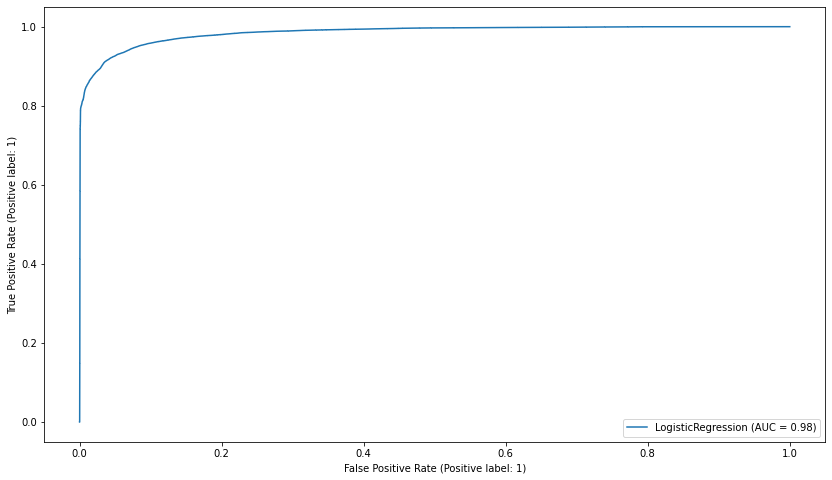

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(LR_SMOTE, X_test, Y_test)

RF AVEC MA METHODE KMEANS SMOTE
---


In [ ]:
RF=RandomForestClassifier()
RF.fit(X_train , Y_train)
RandForSMOTE_Predict=RF.predict(X_train)

In [ ]:
RandForSMOTE_Predict_TEST=RF.predict(X_test)

In [ ]:
print( "Accuracy on training set :" , RF.score(X_train,Y_train))
print( "Accuracy on testing set :" , RF.score(X_test,Y_test))

Accuracy on training set : 1.0
Accuracy on testing set : 0.9999121049115776


In [ ]:
print("Matrice de confusion de RANDOM FOREST SUR MA KMEANS SMOTE : " )
print(confusion_matrix(Y_test,RandForSMOTE_Predict_TEST))
print(classification_report(Y_test,RandForSMOTE_Predict_TEST))

Matrice de confusion de RANDOM FOREST SUR MA KMEANS SMOTE : 
[[84932    15]
 [    0 85711]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84947
           1       1.00      1.00      1.00     85711

    accuracy                           1.00    170658
   macro avg       1.00      1.00      1.00    170658
weighted avg       1.00      1.00      1.00    170658



In [ ]:
precision_RF_SMOTE=precision_score(Y_test,RandForSMOTE_Predict_TEST)
recall_RF_SMOTE=recall_score(Y_test,RandForSMOTE_Predict_TEST)
SCOREF1_RF_SMOTE=f1_score(Y_test,RandForSMOTE_Predict_TEST)
print(" SCORE DE PRECISION  : {} " .format(precision_RF_SMOTE) )
print(" Recall Score  :{} " .format(recall_RF_SMOTE) )
print(" F1-Score  : {}" .format(SCOREF1_RF_SMOTE) )
#print("Random Forest Auroc : {} " .format(rf_auroc))

 SCORE DE PRECISION  : 0.9998250239133984 
 Recall Score  :1.0 
 F1-Score  : 0.9999125043018718


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


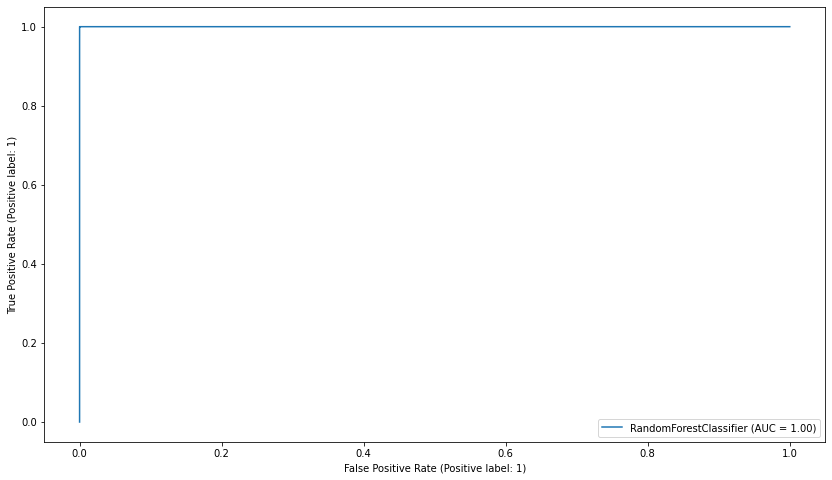

In [ ]:
plot_roc_curve(RF, X_test, Y_test )


SVM AVEC MA METHODE K MEANS SMOTE
---



In [ ]:
SVM_KMEANS_SMOTE=SVC()
SVM_KMEANS_SMOTE.fit(X_train,Y_train)

SVC()

In [ ]:
print( "Accuracy on training set :" , SVM_KMEANS_SMOTE.score(X_train,Y_train))
print( "Accuracy on testing set :" , SVM_KMEANS_SMOTE.score(X_test,Y_test))


Accuracy on training set : 0.9888749930939573
Accuracy on testing set : 0.9886439545758183


In [ ]:
X_test_predict=SVM_KMEANS_SMOTE.predict(X_test)
print("Matrice de confusion DE SVM SUR MA METHODE KMEANS SMOTE : " )
print(confusion_matrix(Y_test,X_test_predict))
print(classification_report(Y_test,X_test_predict))

Matrice de confusion DE SVM SUR MA METHODE KMEANS SMOTE : 
[[83780  1167]
 [  771 84940]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     84947
           1       0.99      0.99      0.99     85711

    accuracy                           0.99    170658
   macro avg       0.99      0.99      0.99    170658
weighted avg       0.99      0.99      0.99    170658



In [ ]:
SVMDB_auroc=roc_auc_score(Y_test,X_test_predict)
print("SVM Auroc : {} " .format(SVMDB_auroc))
precision_SVM_KM_SM=precision_score(Y_test,X_test_predict)
recall_SVM_KM_SM=recall_score(Y_test,X_test_predict)
SCOREF1_SVM_KM_SM=f1_score(Y_test,X_test_predict)
print(" SCORE DE PRECISION  : {} " .format(precision_SVM_KM_SM) )
print(" Recall Score  :{} " .format(recall_SVM_KM_SM) )
print(" F1-Score  : {}" .format(SCOREF1_SVM_KM_SM) )

SVM Auroc : 0.9886333386902637 
 SCORE DE PRECISION  : 0.9864470948935626 
 Recall Score  :0.9910046551784485 
 F1-Score  : 0.9887206229847862


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


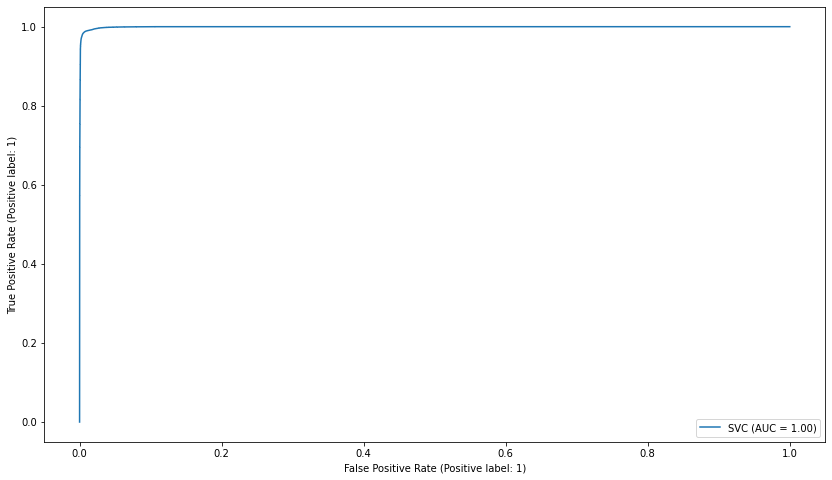

In [ ]:
plot_roc_curve(SVM_KMEANS_SMOTE , X_test, Y_test)

*LES COURBES ROC DANS LE MEME GRAPHE*

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

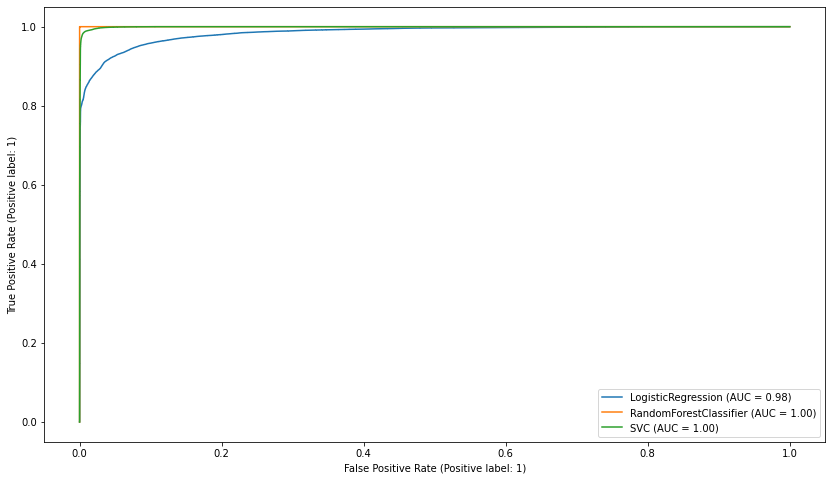

In [ ]:
disp= plot_roc_curve(LR_SMOTE, X_test, Y_test)
plot_roc_curve(RF, X_test, Y_test , ax=disp.ax_);
plot_roc_curve(SVM_KMEANS_SMOTE, X_test, Y_test , ax=disp.ax_)


# **ADASYN SUR MA KMEANS**

---




KMEANS ET ADASYN
---



In [ ]:
ada = ADASYN(random_state=42)
C , D = ada.fit_resample(XDATASMOTE, VAR_Y_SMOTE)
print('Resampled X ET Y dataset shape %s' % Counter(D))



Resampled X ET Y dataset shape Counter({1: 284436, 0: 284430})


In [ ]:
COUNT_Y_KMEANSSMOTE= np.bincount(VAR_Y_SMOTE)
print("le calcule de Y avant adasyn:" , COUNT_Y_KMEANSSMOTE )
COUNT_Y_AFTER_KMEANSADASYN= np.bincount(D)
print("le calcule de Y après adasyn:" , COUNT_Y_AFTER_KMEANSADASYN )

le calcule de Y avant adasyn: [284430    377]
le calcule de Y après adasyn: [284430 284436]


In [ ]:
X_train_KMEANS_ADASYN , X_test_KMEANS_ADASYN , Y_train_KMEANS_ADASYN , Y_test_KMEANS_ADASYN = train_test_split(C , D , test_size=0.3  , random_state=2)


LR AVEC MA METHODE KMEANS ADASYN
---



In [ ]:
LR_KMEANS_ADASYN = LogisticRegression(max_iter=len(DATAFRAME_DE_MA_METHODE_KMEANS))
LR_KMEANS_ADASYN.fit(X_train_KMEANS_ADASYN , Y_train_KMEANS_ADASYN)
X_train_prediction_KM_ADASYN=LR_KMEANS_ADASYN.predict(X_train_KMEANS_ADASYN)
training_data_accuracy = accuracy_score(X_train_prediction_KM_ADASYN, Y_train_KMEANS_ADASYN)
print('Accuracy on training data =' , training_data_accuracy )
X_test_prediction_KM_ADASYN=LR_KMEANS_ADASYN.predict(X_test_KMEANS_ADASYN)
testing_data_accuracy = accuracy_score(X_test_prediction_KM_ADASYN, Y_test_KMEANS_ADASYN)
print('Accuracy on testing data =' , testing_data_accuracy )

Accuracy on training data = 0.8779978202237033
Accuracy on testing data = 0.8793976327200281


In [ ]:
ConfMat=confusion_matrix(Y_test_KMEANS_ADASYN,X_test_prediction_KM_ADASYN)
print("Confusion matrix : ")
print(ConfMat)
print(classification_report(Y_test_KMEANS_ADASYN,X_test_prediction_KM_ADASYN))

Confusion matrix : 
[[76586  8488]
 [12094 73492]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     85074
           1       0.90      0.86      0.88     85586

    accuracy                           0.88    170660
   macro avg       0.88      0.88      0.88    170660
weighted avg       0.88      0.88      0.88    170660



In [ ]:
LR_KM_ADASYN_auroc=roc_auc_score(Y_test_KMEANS_ADASYN,X_test_prediction_KM_ADASYN)
precision_test=precision_score(Y_test_KMEANS_ADASYN,X_test_prediction_KM_ADASYN)
recall_test=recall_score(Y_test_KMEANS_ADASYN,X_test_prediction_KM_ADASYN)
SCOREF1_test=f1_score(Y_test_KMEANS_ADASYN,X_test_prediction_KM_ADASYN)
print(" SCORE DE PRECISION test : {} " .format(precision_test) )
print(" Recall Score test :{} " .format(recall_test) )
print(" F1-Score test : {}" .format(SCOREF1_test) )
print("LR Auroc : {} " .format(LR_KM_ADASYN_auroc))

 SCORE DE PRECISION test : 0.8964625518419127 
 Recall Score test :0.8586918421237119 
 F1-Score test : 0.8771707864363892
LR Auroc : 0.8794599394458511 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


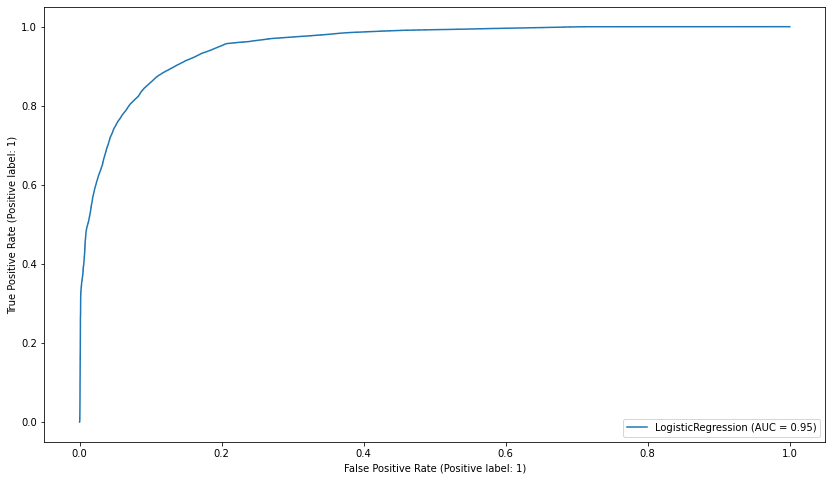

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(LR_KMEANS_ADASYN , X_test_KMEANS_ADASYN , Y_test_KMEANS_ADASYN)

# RF AVEC KMEANS ADASYN ADAPTATIVE

---



In [ ]:
#X_train_KMEANS_ADASYN , X_test_KMEANS_ADASYN , Y_train_KMEANS_ADASYN , Y_test_KMEANS_ADASYN

In [ ]:
X_train_RF_KMEANS_ADASYN , X_test_RF_KMEANS_ADASYN , Y_train_RF_KMEANS_ADASYN , Y_test_RF_KMEANS_ADASYN = train_test_split(C , D , test_size=0.3  , random_state=2)

In [ ]:
RF=RandomForestClassifier()
RF.fit(X_train_RF_KMEANS_ADASYN , Y_train_RF_KMEANS_ADASYN)
RandForSMOTE_Predict=RF.predict(X_train_RF_KMEANS_ADASYN)
RandFor_KM_AD_Predict_TEST=RF.predict(X_test_RF_KMEANS_ADASYN)
print( "Accuracy on training set :" , RF.score(X_train_RF_KMEANS_ADASYN,Y_train_RF_KMEANS_ADASYN))
print( "Accuracy on testing set :" , RF.score(X_test_RF_KMEANS_ADASYN,Y_test_RF_KMEANS_ADASYN))

Accuracy on training set : 1.0
Accuracy on testing set : 0.9998886675260752


In [ ]:
print("Matrice de confusion de RANDOM FOREST SUR MA KMEANS SMOTE : " )
print(confusion_matrix(Y_test_KMEANS_ADASYN,RandFor_KM_AD_Predict_TEST))
print(classification_report(Y_test_KMEANS_ADASYN,RandFor_KM_AD_Predict_TEST))

Matrice de confusion de RANDOM FOREST SUR MA KMEANS SMOTE : 
[[85055    19]
 [    0 85586]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85074
           1       1.00      1.00      1.00     85586

    accuracy                           1.00    170660
   macro avg       1.00      1.00      1.00    170660
weighted avg       1.00      1.00      1.00    170660



In [ ]:
precision_RF_KM_AD=precision_score(Y_test_KMEANS_ADASYN,RandFor_KM_AD_Predict_TEST)
recall_RF_KM_AD=recall_score(Y_test_KMEANS_ADASYN,RandFor_KM_AD_Predict_TEST)
SCOREF1_RF_KM_AD=f1_score(Y_test_KMEANS_ADASYN,RandFor_KM_AD_Predict_TEST)
print(" SCORE DE PRECISION  : {} " .format(precision_RF_KM_AD) )
print(" Recall Score  :{} " .format(recall_RF_KM_AD) )
print(" F1-Score  : {}" .format(SCOREF1_RF_KM_AD) )

 SCORE DE PRECISION  : 0.9997780503475264 
 Recall Score  :1.0 
 F1-Score  : 0.9998890128569843


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


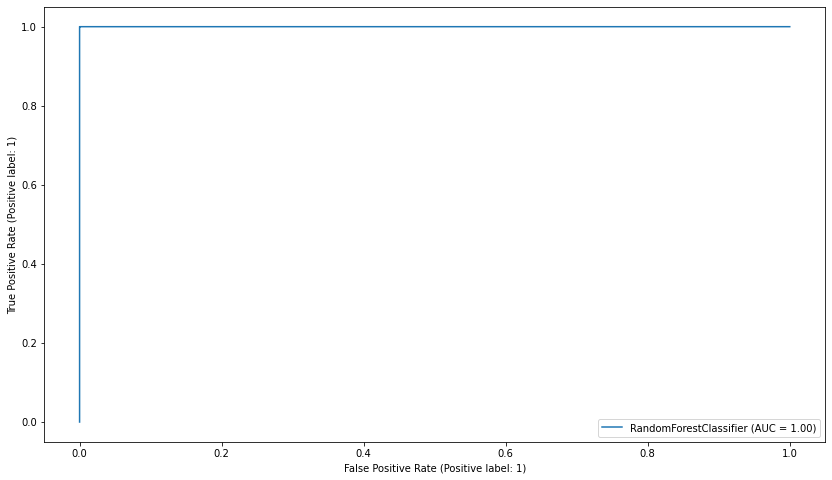

In [ ]:
plot_roc_curve(RF, X_test_KMEANS_ADASYN , Y_test_KMEANS_ADASYN )

# SVM AVEC KMEANS ADASYN

In [ ]:
#X_train_KMEANS_ADASYN , X_test_KMEANS_ADASYN , Y_train_KMEANS_ADASYN , Y_test_KMEANS_ADASYN

In [ ]:
SVM_KMEANS_ADASYN=SVC()
SVM_KMEANS_ADASYN.fit(X_train_KMEANS_ADASYN , Y_train_KMEANS_ADASYN)
print( "Accuracy on training set :" , SVM_KMEANS_ADASYN.score(X_train_KMEANS_ADASYN , Y_train_KMEANS_ADASYN))
print( "Accuracy on testing set :" , SVM_KMEANS_ADASYN.score(X_test_KMEANS_ADASYN,Y_test_KMEANS_ADASYN))


Accuracy on training set : 0.9946937012501067
Accuracy on testing set : 0.9945915856088129


In [ ]:
X_test_predict_SVM=SVM_KMEANS_ADASYN.predict(X_test_KMEANS_ADASYN)
print("Matrice de confusion DE SVM SUR MA METHODE KMEANS SMOTE : " )
print(confusion_matrix(Y_test_KMEANS_ADASYN , X_test_predict_SVM))
print(classification_report(Y_test_KMEANS_ADASYN , X_test_predict_SVM))

Matrice de confusion DE SVM SUR MA METHODE KMEANS SMOTE : 
[[84154   920]
 [    3 85583]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85074
           1       0.99      1.00      0.99     85586

    accuracy                           0.99    170660
   macro avg       0.99      0.99      0.99    170660
weighted avg       0.99      0.99      0.99    170660



In [ ]:
SVMDB_auroc=roc_auc_score(Y_test_KMEANS_ADASYN , X_test_predict_SVM)
print("SVM Auroc : {} " .format(SVMDB_auroc))

SVM Auroc : 0.9945754163837391 


In [ ]:
precision_SVM_KM_AD=precision_score(Y_test_KMEANS_ADASYN , X_test_predict_SVM)
recall_SVM_KM_AD=recall_score(Y_test_KMEANS_ADASYN , X_test_predict_SVM)
SCOREF1_SVM_KM_AD=f1_score(Y_test_KMEANS_ADASYN , X_test_predict_SVM)
print(" SCORE DE PRECISION  : {} " .format(precision_SVM_KM_AD) )
print(" Recall Score  :{} " .format(recall_SVM_KM_AD) )
print(" F1-Score  : {}" .format(SCOREF1_SVM_KM_AD) )

 SCORE DE PRECISION  : 0.9893645307099176 
 Recall Score  :0.9999649475381488 
 F1-Score  : 0.9946364962316011


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


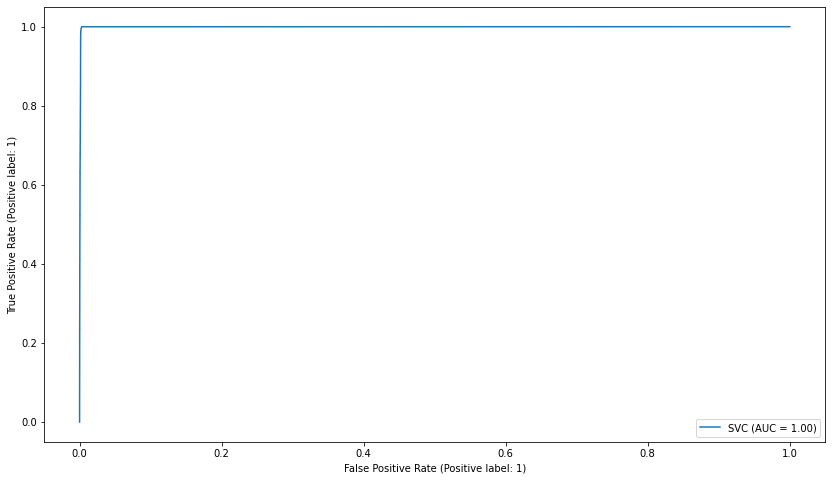

In [ ]:
plot_roc_curve(SVM_KMEANS_ADASYN, X_test_KMEANS_ADASYN , Y_test_KMEANS_ADASYN )

*Les courbes de Kmeans Adasyn dans le meme graphe*

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

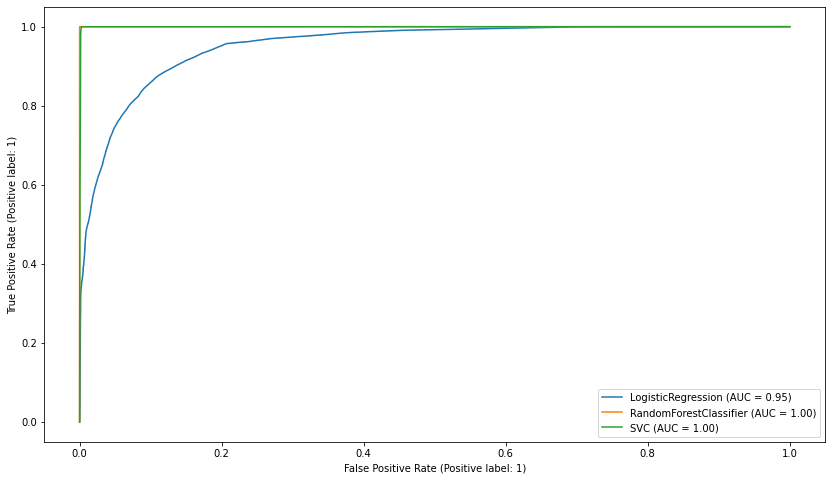

In [ ]:
DISP=plot_roc_curve(LR_KMEANS_ADASYN , X_test_KMEANS_ADASYN , Y_test_KMEANS_ADASYN)
plot_roc_curve(RF, X_test_KMEANS_ADASYN , Y_test_KMEANS_ADASYN , ax=DISP.ax_);
plot_roc_curve(SVM_KMEANS_ADASYN, X_test_KMEANS_ADASYN , Y_test_KMEANS_ADASYN , ax=DISP.ax_)



---

#**KMEANS 2**

In [ ]:
DATAFRAME_OF_FRAUDE=X_CORRECT.loc[X_CORRECT['Class'] == 1]
DATAFRAME_OF_NORMAL=X_CORRECT.loc[X_CORRECT['Class'] == 0]

In [ ]:
print(' ', AUG_CLUSTER_1.shape)
print(' ', AUG_CLUSTER_2.shape)
print(' ', AUG_CLUSTER_3.shape)

  (217088, 29)
  (60462, 29)
  (5751, 29)


In [ ]:
DATAFRAME_OF_CLUSTER1_KMEANS2= X_CORRECT.iloc[DATAPOINTS_OF_CLUSTER1]
DATAFRAME_OF_CLUSTER2_KMEANS2= X_CORRECT.iloc[DATAPOINTS_OF_CLUSTER2]
DATAFRAME_OF_CLUSTER3_KMEANS2= X_CORRECT.iloc[DATAPOINTS_OF_CLUSTER3]

In [ ]:
DATAFRAME_OF_CLUSTER1_KMEANS2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1


In [ ]:
type(AUG_CLUSTER_1)

pandas.core.frame.DataFrame

In [ ]:
AUG_CLUSTER_1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
DF_AUG_CLUST1_KM2 = AUG_CLUSTER_1.append(DATAFRAME_OF_CLUSTER1_KMEANS2)

In [ ]:
DF_AUG_CLUST2_KM2 = AUG_CLUSTER_2.append(DATAFRAME_OF_CLUSTER2_KMEANS2)

In [ ]:
DF_AUG_CLUST3_KM2 = AUG_CLUSTER_3.append(DATAFRAME_OF_CLUSTER3_KMEANS2)

In [ ]:
DF_AUG_CLUST1_KM2.shape

(217465, 29)



---
#*KMEANS SMOTE 2*


In [ ]:
X_CLSTR1_SMOTE = DF_AUG_CLUST1_KM2.drop('Class' , axis=1)
Y_CLSTR1_SMOTE = DF_AUG_CLUST1_KM2['Class']


In [ ]:
from collections import Counter

# transform the dataset
oversample = SMOTE()
X_SMOTE_Pourcentage_CLUSTER1 , Y_SMOTE_Pourcentage_CLUSTER1  = oversample.fit_resample(X_CLSTR1_SMOTE , Y_CLSTR1_SMOTE)


In [ ]:
Counter(Y_SMOTE_Pourcentage_CLUSTER1)

Counter({0: 217088, 1: 217088})

In [ ]:
X_CLSTR2_SMOTE = DF_AUG_CLUST2_KM2.drop('Class' , axis=1)
Y_CLSTR2_SMOTE = DF_AUG_CLUST2_KM2['Class']


In [ ]:
from collections import Counter

# transform the dataset
oversample = SMOTE()
X_SMOTE_Pourcentage_CLUSTER2 , Y_SMOTE_Pourcentage_CLUSTER2  = oversample.fit_resample(X_CLSTR2_SMOTE , Y_CLSTR2_SMOTE)


In [ ]:
Counter(Y_SMOTE_Pourcentage_CLUSTER2)

Counter({0: 60462, 1: 60462})

In [ ]:
X_CLSTR3_SMOTE = DF_AUG_CLUST3_KM2.drop('Class' , axis=1)
Y_CLSTR3_SMOTE = DF_AUG_CLUST3_KM2['Class']


In [ ]:
from collections import Counter

# transform the dataset
oversample = SMOTE()
X_SMOTE_Pourcentage_CLUSTER3 , Y_SMOTE_Pourcentage_CLUSTER3  = oversample.fit_resample(X_CLSTR3_SMOTE , Y_CLSTR3_SMOTE)


In [ ]:
Counter(Y_SMOTE_Pourcentage_CLUSTER3)

Counter({0: 5751, 1: 5751})

In [ ]:
type(X_SMOTE_Pourcentage_CLUSTER1)

pandas.core.frame.DataFrame

In [ ]:
X_SMOTE_Pourcentage_CLUSTER1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [ ]:
DF_DE_2_CLUSTER = X_SMOTE_Pourcentage_CLUSTER1.append(X_SMOTE_Pourcentage_CLUSTER2)

In [ ]:
len(DF_DE_2_CLUSTER)

555100

In [ ]:
DF_COMPLET_KMEANS_SMOTE2 = DF_DE_2_CLUSTER.append(X_SMOTE_Pourcentage_CLUSTER3)

In [ ]:
len(DF_COMPLET_KMEANS_SMOTE2)

566602

In [ ]:
DF_Y_DE2CLUSTER_KMEANS_SMOTE2 = Y_SMOTE_Pourcentage_CLUSTER3.append(Y_SMOTE_Pourcentage_CLUSTER2)

In [ ]:
DF_Y_COMPLET_KMEANS_SMOTE2 = DF_Y_DE2CLUSTER_KMEANS_SMOTE2.append(Y_SMOTE_Pourcentage_CLUSTER1)

In [ ]:
len(DF_Y_COMPLET_KMEANS_SMOTE2)

566602

In [ ]:
X_train_KMEANS_SMOTE2 , X_test_KMEANS_SMOTE2 , Y_train_KMEANS_SMOTE2 , Y_test_KMEANS_SMOTE2 = train_test_split(DF_COMPLET_KMEANS_SMOTE2 , DF_Y_COMPLET_KMEANS_SMOTE2 , test_size=0.3 , random_state=2)

In [ ]:
print("X = " ,DF_COMPLET_KMEANS_SMOTE2.shape )
print("X_train = " , X_train_KMEANS_SMOTE2.shape)
print("X_test = " , X_test_KMEANS_SMOTE2.shape)
print("    ")
print("Y = " , DF_Y_COMPLET_KMEANS_SMOTE2.shape )
print("Y_train =" , Y_train_KMEANS_SMOTE2.shape)
print("Y_test =" , Y_test_KMEANS_SMOTE2.shape )

X =  (566602, 28)
X_train =  (396621, 28)
X_test =  (169981, 28)
    
Y =  (566602,)
Y_train = (396621,)
Y_test = (169981,)




---

*LR KMEANS SMOTE 2*

Accuracy on training data = 0.6331939055168536
Accuracy on testing data = 0.6344061983398145
Confusion matrix : 
[[58346 26649]
 [35495 49491]]
              precision    recall  f1-score   support

           0       0.62      0.69      0.65     84995
           1       0.65      0.58      0.61     84986

    accuracy                           0.63    169981
   macro avg       0.64      0.63      0.63    169981
weighted avg       0.64      0.63      0.63    169981

LR Auroc : 0.6344034418893302 
 SCORE DE PRECISION test : 0.65 
 Recall Score test :0.5823429741369167 
 F1-Score test : 0.614314263371523


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


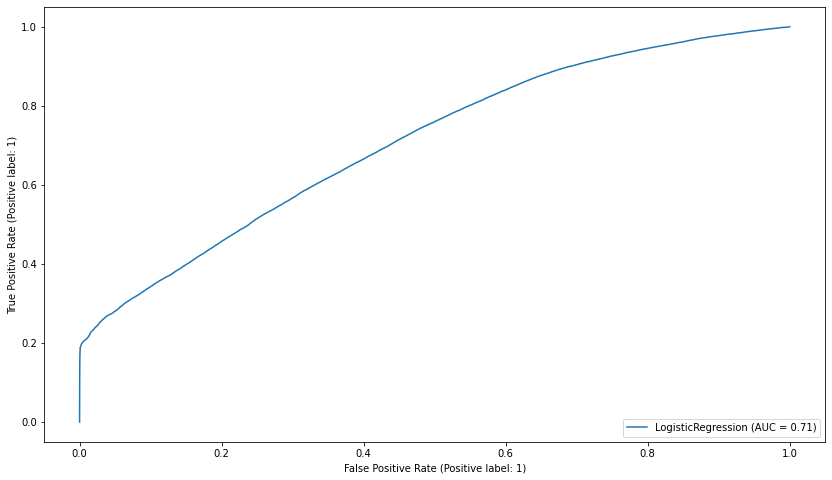

In [ ]:
LR_KMEANS_SMOTE = LogisticRegression(max_iter=len(DF_COMPLET_KMEANS_SMOTE2))
LR_KMEANS_SMOTE.fit(X_train_KMEANS_SMOTE2 , Y_train_KMEANS_SMOTE2)
X_train_prediction_KM_SM2 =LR_KMEANS_SMOTE.predict(X_train_KMEANS_SMOTE2)
training_data_accuracy = accuracy_score(X_train_prediction_KM_SM2, Y_train_KMEANS_SMOTE2)
print('Accuracy on training data =' , training_data_accuracy )
X_test_prediction_KM_SM2 =LR_KMEANS_SMOTE.predict(X_test_KMEANS_SMOTE2)
testing_data_accuracy = accuracy_score(X_test_prediction_KM_SM2, Y_test_KMEANS_SMOTE2)
print('Accuracy on testing data =' , testing_data_accuracy )
ConfMat=confusion_matrix(Y_test_KMEANS_SMOTE2,X_test_prediction_KM_SM2)
print("Confusion matrix : ")
print(ConfMat)
print(classification_report(Y_test_KMEANS_SMOTE2,X_test_prediction_KM_SM2))
LR_auroc=roc_auc_score(Y_test_KMEANS_SMOTE2,X_test_prediction_KM_SM2)
print("LR Auroc : {} " .format(LR_auroc))
precision_test=precision_score(Y_test_KMEANS_SMOTE2,X_test_prediction_KM_SM2)
recall_test=recall_score(Y_test_KMEANS_SMOTE2,X_test_prediction_KM_SM2)
SCOREF1_test=f1_score(Y_test_KMEANS_SMOTE2,X_test_prediction_KM_SM2)
print(" SCORE DE PRECISION test : {} " .format(precision_test) )
print(" Recall Score test :{} " .format(recall_test) )
print(" F1-Score test : {}" .format(SCOREF1_test) )
from sklearn.metrics import plot_roc_curve
plot_roc_curve(LR_KMEANS_SMOTE , X_test_KMEANS_SMOTE2 , Y_test_KMEANS_SMOTE2)

*RF KMEANS SMOTE 2*

Accuracy on training data = 0.9275202271185843
Accuracy on testing data = 0.6016731281731488
Confusion matrix : 
[[49657 35338]
 [32370 52616]]
              precision    recall  f1-score   support

           0       0.61      0.58      0.59     84995
           1       0.60      0.62      0.61     84986

    accuracy                           0.60    169981
   macro avg       0.60      0.60      0.60    169981
weighted avg       0.60      0.60      0.60    169981

LR Auroc : 0.6016740515537822 
 SCORE DE PRECISION test : 0.598221797757919 
 Recall Score test :0.6191137363801097 
 F1-Score test : 0.6084884931190008


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


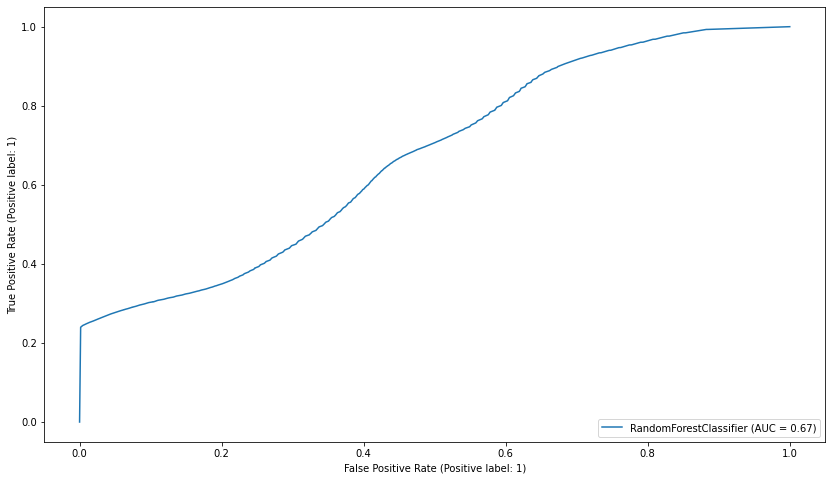

In [ ]:
RF_KMEANS_SMOTE2 = RandomForestClassifier()

RF_KMEANS_SMOTE2.fit(X_train_KMEANS_SMOTE2 , Y_train_KMEANS_SMOTE2)
X_train_prediction_KM_SM2 =RF_KMEANS_SMOTE2.predict(X_train_KMEANS_SMOTE2)
training_data_accuracy = accuracy_score(X_train_prediction_KM_SM2, Y_train_KMEANS_SMOTE2)
print('Accuracy on training data =' , training_data_accuracy )
X_test_prediction_RF_KM_SM2 =RF_KMEANS_SMOTE2.predict(X_test_KMEANS_SMOTE2)
testing_data_accuracy = accuracy_score(X_test_prediction_RF_KM_SM2, Y_test_KMEANS_SMOTE2)
print('Accuracy on testing data =' , testing_data_accuracy )
ConfMat=confusion_matrix(Y_test_KMEANS_SMOTE2,X_test_prediction_RF_KM_SM2)
print("Confusion matrix : ")
print(ConfMat)
print(classification_report(Y_test_KMEANS_SMOTE2,X_test_prediction_RF_KM_SM2))
RF_auroc=roc_auc_score(Y_test_KMEANS_SMOTE2,X_test_prediction_RF_KM_SM2)
print("LR Auroc : {} " .format(RF_auroc))
precision_test=precision_score(Y_test_KMEANS_SMOTE2,X_test_prediction_RF_KM_SM2)
recall_test=recall_score(Y_test_KMEANS_SMOTE2,X_test_prediction_RF_KM_SM2)
SCOREF1_test=f1_score(Y_test_KMEANS_SMOTE2,X_test_prediction_RF_KM_SM2)
print(" SCORE DE PRECISION test : {} " .format(precision_test) )
print(" Recall Score test :{} " .format(recall_test) )
print(" F1-Score test : {}" .format(SCOREF1_test) )
from sklearn.metrics import plot_roc_curve
plot_roc_curve(RF_KMEANS_SMOTE2 , X_test_KMEANS_SMOTE2 , Y_test_KMEANS_SMOTE2)

*SVM KMEANS SMOTE 2*

In [ ]:
SVM_KMEANS_SMOTE2 = SVC()

SVM_KMEANS_SMOTE2.fit(X_train_KMEANS_SMOTE2 , Y_train_KMEANS_SMOTE2)
X_train_prediction_KM_SM2 =SVM_KMEANS_SMOTE2.predict(X_train_KMEANS_SMOTE2)
training_data_accuracy = accuracy_score(X_train_prediction_KM_SM2, Y_train_KMEANS_SMOTE2)
print('Accuracy on training data =' , training_data_accuracy )
X_test_prediction_SVM_KM_SM2 =SVM_KMEANS_SMOTE2.predict(X_test_KMEANS_SMOTE2)
testing_data_accuracy = accuracy_score(X_test_prediction_SVM_KM_SM2, Y_test_KMEANS_SMOTE2)
print('Accuracy on testing data =' , testing_data_accuracy )
ConfMat=confusion_matrix(Y_test_KMEANS_SMOTE2,X_test_prediction_SVM_KM_SM2)
print("Confusion matrix : ")
print(ConfMat)
print(classification_report(Y_test_KMEANS_SMOTE2,X_test_prediction_SVM_KM_SM2))
RF_auroc=roc_auc_score(Y_test_KMEANS_SMOTE2,X_test_prediction_SVM_KM_SM2)
print("LR Auroc : {} " .format(RF_auroc))
precision_test=precision_score(Y_test_KMEANS_SMOTE2,X_test_prediction_SVM_KM_SM2)
recall_test=recall_score(Y_test_KMEANS_SMOTE2,X_test_prediction_SVM_KM_SM2)
SCOREF1_test=f1_score(Y_test_KMEANS_SMOTE2,X_test_prediction_SVM_KM_SM2)
print(" SCORE DE PRECISION test : {} " .format(precision_test) )
print(" Recall Score test :{} " .format(recall_test) )
print(" F1-Score test : {}" .format(SCOREF1_test) )
from sklearn.metrics import plot_roc_curve
plot_roc_curve(SVM_KMEANS_SMOTE2 , X_test_KMEANS_SMOTE2 , Y_test_KMEANS_SMOTE2)

*LES COURBES ROC DES CLASSIFICATEURS DANS LE MEME GRAPHE DE KMEANS SMOTE 2*

In [ ]:
DISPLAY_KMEANS_SMOTE2 =plot_roc_curve(LR_KMEANS_SMOTE , X_test_KMEANS_SMOTE2 , Y_test_KMEANS_SMOTE2)
plot_roc_curve(RF_KMEANS_SMOTE2 , X_test_KMEANS_SMOTE2 , Y_test_KMEANS_SMOTE2 , ax=DISPLAY_KMEANS_SMOTE2.ax_);
plot_roc_curve(SVM_KMEANS_SMOTE2 , X_test_KMEANS_SMOTE2 , Y_test_KMEANS_SMOTE2 , ax=DISPLAY_KMEANS_SMOTE2.ax_)



---
# **DB SCAN**


In [ ]:
# extracting the above mentioned columns
#x = fraud.loc[:, [feature_colonnes]].values
X_DBSCAN= XSCORESILHOUETTE.values

In [ ]:
len(X_DBSCAN)

492

In [ ]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(X_DBSCAN) # fitting the data to the object
distances,indices=nbrs.kneighbors(X_DBSCAN) # finding the nearest neighbours

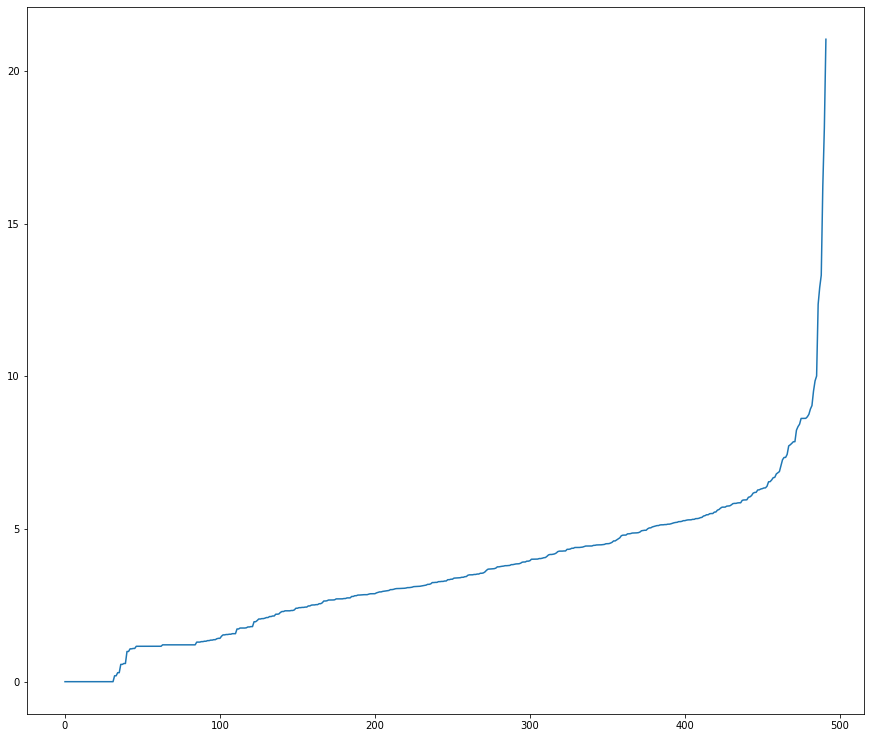

In [ ]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (15,13) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [ ]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 8, min_samples = 29).fit(X_DBSCAN) # fitting the model
labels = dbscan.labels_ # getting the labels

In [ ]:
silhouette_score(X_DBSCAN,labels)

0.42180264519578814

In [ ]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan3 = DBSCAN(eps = 8, min_samples = 28).fit(X_DBSCAN) # fitting the model
labels3 = dbscan3.labels_ # getting the labels
silhouette_score(X_DBSCAN,labels3)

0.4238965746883454

In [ ]:
len(labels3)

492

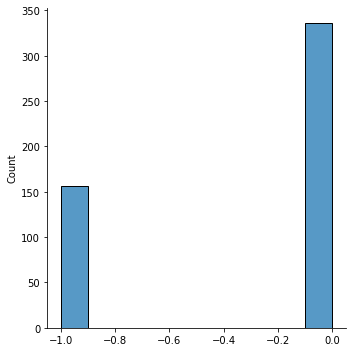

In [ ]:
sns.displot(data=labels3)

(array([156.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 336.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <a list of 10 Patch objects>)

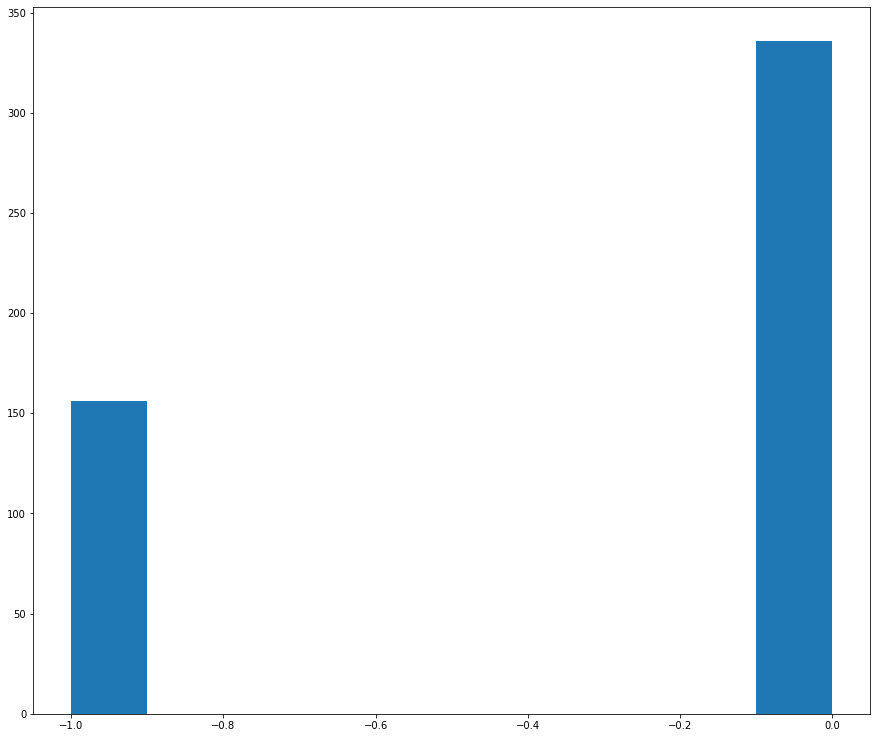

In [ ]:
plt.hist(labels3)

In [ ]:
pd.crosstab(labels3 , YFRAUDE , rownames=['Clusters'] , colnames=['Classes'])

Classes,1
Clusters,
-1,156
0,336


In [ ]:
clusters_DBSCAN = pd.DataFrame()
clusters_DBSCAN['valeurs'] = XSCORESILHOUETTE.index.values
clusters_DBSCAN['cluster'] = labels3

In [ ]:
clusters_DBSCAN

,valeurs,cluster
0,541,0
1,623,0
2,4920,0
3,6108,0
4,6329,0
...,...,...
487,279863,0
488,280143,0
489,280149,0
490,281144,0


In [ ]:
CLUSTER1_DBSCAN= clusters_DBSCAN[clusters_DBSCAN.cluster == -1]
CLUSTER2_DBSCAN= clusters_DBSCAN[clusters_DBSCAN.cluster == 0]

In [ ]:
CLUSTER1_DBSCAN

,valeurs,cluster
24,6971,-1
25,8296,-1
27,8335,-1
28,8615,-1
32,8972,-1
...,...,...
449,247673,-1
455,249607,-1
470,258403,-1
481,272521,-1


In [ ]:
DATAPOINTS_OF_CLUSTER1_DBSCAN= CLUSTER1_DBSCAN.loc[:, 'valeurs'].values
DATAPOINTS_OF_CLUSTER2_DBSCAN= CLUSTER2_DBSCAN.loc[:, 'valeurs'].values

In [ ]:
DATAPOINTS_OF_TWO_CLUSTERS_DBSCAN = np.append(DATAPOINTS_OF_CLUSTER1_DBSCAN , DATAPOINTS_OF_CLUSTER2_DBSCAN )

In [ ]:
len(DATAPOINTS_OF_TWO_CLUSTERS_DBSCAN)

492

In [ ]:
len(DATAPOINTS_OF_CLUSTER1_DBSCAN)

156

In [ ]:
type(DATAPOINTS_OF_CLUSTER1_DBSCAN)

numpy.ndarray

In [ ]:
len(DATAPOINTS_OF_CLUSTER2_DBSCAN)

336

In [ ]:
DATAPOINTS_OF_CLUSTER1_DBSCAN

array([  6971,   8296,   8335,   8615,   8972,   9035,   9179,   9252,
         9487,   9509,  10204,  10568,  10630,  10690,  10801,  10891,
        10897,  11343,  11710,  11841,  11880,  12070,  12108,  12261,
        12369,  14170,  14197,  14211,  15166,  15204,  15225,  15451,
        15476,  15506,  15539,  15566,  15736,  15751,  15781,  15810,
        16780,  17317,  17366,  17407,  17453,  17480,  33276,  41943,
        42473,  42528,  42549,  42590,  42609,  42635,  42674,  42696,
        42700,  42741,  42756,  42769,  42784,  42856,  42887,  42936,
        42945,  42958,  43061,  43160,  43204,  43428,  43681,  44223,
        44270,  63421,  63634,  64329,  64411,  64460,  74794,  77682,
        82400,  83297,  89190,  94218, 102441, 102442, 102443, 102444,
       102445, 102446, 149145, 149600, 150601, 150644, 150647, 150654,
       150660, 150661, 150662, 150663, 150665, 150666, 150667, 150668,
       150669, 150677, 150678, 150679, 150680, 150684, 150687, 150692,
      

In [ ]:
X_CORRECT = df.drop(columns=['Time','Amount'], axis=1)
Y_CORRECT = df['Class']
#Split

In [ ]:
DATAFRAME_OF_NORMAL=X_CORRECT.loc[X_CORRECT['Class'] == 0]
len(DATAFRAME_OF_NORMAL)

284315

In [ ]:
DATAFRAME_OF_NORMAL.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
DATAFRAME_OF_FRAUDE=X_CORRECT.loc[X_CORRECT['Class'] == 1]
len(DATAFRAME_OF_FRAUDE)

492

In [ ]:
LIST_DATAPOINTS_2_CLUSTERS_DBSCAN = DATAPOINTS_OF_TWO_CLUSTERS_DBSCAN.tolist()

In [ ]:
DATAPOINTS_OF_TWO_CLUSTERS_DBSCAN

array([  6971,   8296,   8335,   8615,   8972,   9035,   9179,   9252,
         9487,   9509,  10204,  10568,  10630,  10690,  10801,  10891,
        10897,  11343,  11710,  11841,  11880,  12070,  12108,  12261,
        12369,  14170,  14197,  14211,  15166,  15204,  15225,  15451,
        15476,  15506,  15539,  15566,  15736,  15751,  15781,  15810,
        16780,  17317,  17366,  17407,  17453,  17480,  33276,  41943,
        42473,  42528,  42549,  42590,  42609,  42635,  42674,  42696,
        42700,  42741,  42756,  42769,  42784,  42856,  42887,  42936,
        42945,  42958,  43061,  43160,  43204,  43428,  43681,  44223,
        44270,  63421,  63634,  64329,  64411,  64460,  74794,  77682,
        82400,  83297,  89190,  94218, 102441, 102442, 102443, 102444,
       102445, 102446, 149145, 149600, 150601, 150644, 150647, 150654,
       150660, 150661, 150662, 150663, 150665, 150666, 150667, 150668,
       150669, 150677, 150678, 150679, 150680, 150684, 150687, 150692,
      

In [ ]:
DATAFRAME_OF_MISSING_POINTS=DATAFRAME_OF_FRAUDE.drop([6971, 8296, 8335, 8615, 8972, 9035, 9179, 9252, 9487, 9509, 10204, 10568, 10630, 10690, 10801, 10891, 10897, 11343, 11710, 11841, 11880, 12070, 12108, 12261, 12369, 14170, 14197, 14211, 15166, 15204, 15225, 15451,15476,  15506,  15539,  15566,  15736,  15751,  15781,  15810,
        16780,  17317,  17366,  17407,  17453,  17480,  33276,  41943,
        42473,  42528,  42549,  42590,  42609,  42635,  42674,  42696,
        42700,  42741,  42756,  42769,  42784,  42856,  42887,  42936,
        42945,  42958,  43061,  43160,  43204,  43428,  43681,  44223,
        44270,  63421,  63634,  64329,  64411,  64460,  74794,  77682,
        82400,  83297,  89190,  94218, 102441, 102442, 102443, 102444,
       102445, 102446, 149145, 149600, 150601, 150644, 150647, 150654,
       150660, 150661, 150662, 150663, 150665, 150666, 150667, 150668,
       150669, 150677, 150678, 150679, 150680, 150684, 150687, 150692,
       150697, 150715, 150925, 151006, 151007, 151008, 151009, 151011,
       151462, 151519, 151730, 151807, 152019, 152223, 152295, 153823,
       153835, 153885, 154234, 154286, 154371, 154587, 154670, 154684,
       154718, 154719, 154720, 167184, 167305, 189878, 198868, 213092,
       221041, 239501, 243699, 243749, 243848, 244004, 244333, 247673,
       249607, 258403, 272521, 274382,541,    623,   4920,   6108,
         6329,   6331,   6334,   6336,   6338,   6427,   6446,   6472,
         6529,   6609,   6641,   6717,   6719,   6734,   6774,   6820,
         6870,   6882,   6899,   6903,   8312,   8617,   8842,   8845,
        10484,  10497,  10498,  14104,  14338,  16415,  16863,  18466,
        18472,  18773,  18809,  20198,  23308,  23422,  26802,  27362,
        27627,  27738,  27749,  29687,  30100,  30314,  30384,  30398,
        30442,  30473,  30496,  31002,  39183,  40085,  40525,  41395,
        41569,  42007,  42009,  43624,  43773,  44001,  44091,  44556,
        45203,  45732,  46909,  46918,  46998,  47802,  48094,  50211,
        50537,  52466,  52521,  52584,  53591,  53794,  55401,  56703,
        57248,  57470,  57615,  58422,  58761,  59539,  61787,  68067,
        68320,  68522,  68633,  69498,  69980,  70141,  70589,  72757,
        73784,  73857,  74496,  74507,  75511,  76555,  76609,  76929,
        77099,  77348,  77387,  79525,  79536,  79835,  79874,  79883,
        80760,  81186,  81609,  83053,  83417,  84543,  86155,  87354,
        88258,  88307,  88876,  88897,  91671,  92777,  93424,  93486,
        93788,  95534,  95597,  96341,  96789,  96994,  99506, 100623,
       101509, 102782, 105178, 106679, 106998, 107067, 107637, 108258,
       108708, 111690, 112840, 114271, 116139, 116404, 118308, 119714,
       119781, 120505, 120837, 122479, 123141, 123201, 123238, 123270,
       123301, 124036, 124087, 124115, 124176, 125342, 128479, 131272,
       135718, 137705, 140786, 141257, 141258, 141259, 141260, 142405,
       142557, 143188, 143333, 143334, 143335, 143336, 143728, 143731,
       144104, 144108, 144754, 145800, 146790, 147548, 147605, 149357,
       149522, 149577, 149587, 149869, 149874, 151103, 151196, 154454,
       154633, 154668, 154676, 154693, 154694, 154697, 154960, 156988,
       156990, 157585, 157868, 157871, 157918, 163149, 163586, 172787,
       176049, 177195, 178208, 181966, 182992, 183106, 184379, 189587,
       189701, 190368, 191074, 191267, 191359, 191544, 191690, 192382,
       192529, 192584, 192687, 195383, 197586, 199896,201098, 201601,
       203324, 203328, 203700, 204064, 204079, 204503, 208651, 212516,
       212644, 213116, 214662, 214775, 215132, 215953, 215984, 218442,
       219025, 219892, 220725, 221018, 222133, 222419, 223366, 223572,
       223578, 223618, 226814, 226877, 229712, 229730, 230076, 230476,
       231978, 233258, 234574, 234632, 234633, 234705, 235616, 235634,
       235644, 237107, 237426, 238222, 238366, 238466, 239499, 240222,
       241254, 241445, 243393, 243547, 245347, 245556, 247995, 248296,
       248971, 249167, 249239, 249828, 249963, 250761, 251477, 251866,
       251881, 251891, 251904, 252124, 252774, 254344, 254395, 255403,
       255556, 261056, 261473, 261925, 262560, 262826, 263080, 263274,
       263324, 263877, 268375, 274475, 275992, 276071, 276864, 279863,
       280143, 280149, 281144, 281674])

In [ ]:
len(DATAFRAME_OF_MISSING_POINTS)

0

In [ ]:
DATAFRAME_OF_MISSING_POINTS_2=X_CORRECT.drop(index=DATAPOINTS_OF_TWO_CLUSTERS_DBSCAN.tolist() , axis= 0)

In [ ]:
DATAFRAME_OF_MISSING_POINTS_2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


In [ ]:
DATAFRAME_OF_CLUSTER1_DBSCAN= X_CORRECT.iloc[DATAPOINTS_OF_CLUSTER1_DBSCAN]

In [ ]:
len(DATAFRAME_OF_CLUSTER1_DBSCAN)

156

In [ ]:
DATAFRAME_OF_CLUSTER1_DBSCAN.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
6971,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.775680,-1.987773,...,-3.042626,-1.052368,0.204817,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,1
8296,-2.125490,5.973556,-11.034727,9.007147,-1.689451,-2.854415,-7.810441,2.030870,-5.902828,-12.840934,...,1.493775,1.646518,-0.278485,-0.664841,-1.164555,1.701796,0.690806,2.119749,1.108933,1
8335,-1.426623,4.141986,-9.804103,6.666273,-4.749527,-2.073129,-10.089931,2.791345,-3.249516,-11.420451,...,1.410678,1.865679,0.407809,0.605809,-0.769348,-1.746337,0.502040,1.977258,0.711607,1
8615,-3.891192,7.098916,-11.426467,8.607557,-2.065706,-2.985288,-8.138589,2.973928,-6.272790,-13.193415,...,1.382619,1.757085,-0.189709,-0.508629,-1.189308,1.188536,0.605242,1.881529,0.875260,1
8972,-4.064005,3.100935,-1.188498,3.264633,-1.903562,0.320351,-0.954940,-3.277535,2.820829,1.015113,...,-0.531898,1.688665,-0.078845,0.193731,0.479496,-0.506603,-0.409863,-3.036271,-0.630605,1


In [ ]:
DATAFRAME_OF_CLUSTER1_DBSCAN['Class']=DATAFRAME_OF_CLUSTER1_DBSCAN['Class'].replace(to_replace=1 , value = 0 )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
DATAFRAME_OF_CLUSTER1_DBSCAN.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
6971,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.775680,-1.987773,...,-3.042626,-1.052368,0.204817,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,0
8296,-2.125490,5.973556,-11.034727,9.007147,-1.689451,-2.854415,-7.810441,2.030870,-5.902828,-12.840934,...,1.493775,1.646518,-0.278485,-0.664841,-1.164555,1.701796,0.690806,2.119749,1.108933,0
8335,-1.426623,4.141986,-9.804103,6.666273,-4.749527,-2.073129,-10.089931,2.791345,-3.249516,-11.420451,...,1.410678,1.865679,0.407809,0.605809,-0.769348,-1.746337,0.502040,1.977258,0.711607,0
8615,-3.891192,7.098916,-11.426467,8.607557,-2.065706,-2.985288,-8.138589,2.973928,-6.272790,-13.193415,...,1.382619,1.757085,-0.189709,-0.508629,-1.189308,1.188536,0.605242,1.881529,0.875260,0
8972,-4.064005,3.100935,-1.188498,3.264633,-1.903562,0.320351,-0.954940,-3.277535,2.820829,1.015113,...,-0.531898,1.688665,-0.078845,0.193731,0.479496,-0.506603,-0.409863,-3.036271,-0.630605,0


In [ ]:
DF_CLASS_MAJ_DBSCAN = DATAFRAME_OF_MISSING_POINTS_2.append(DATAFRAME_OF_CLUSTER1_DBSCAN)

In [ ]:
len(DF_CLASS_MAJ_DBSCAN)

284471

In [ ]:
DATAFRAME_OF_CLUSTER2_DBSCAN = X_CORRECT.iloc[DATAPOINTS_OF_CLUSTER2_DBSCAN]

In [ ]:
len(DATAFRAME_OF_CLUSTER2_DBSCAN)

336

In [ ]:
DATAFRAME_OF_CLUSTER2_DBSCAN.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1


In [ ]:
DF_COMPLET_DE_MA_DBSCAN = DF_CLASS_MAJ_DBSCAN.append(DATAFRAME_OF_CLUSTER2_DBSCAN)

In [ ]:
DF_COMPLET_DE_MA_DBSCAN

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,1


In [ ]:
#XDATASMOTE = DATAFRAME_DE_MA_METHODE_KMEANS.drop('Class' , axis=1)
#VAR_Y_SMOTE = DATAFRAME_DE_MA_METHODE_KMEANS['Class']

In [ ]:
X_DBSCAN_OVERSAMPLING = DF_COMPLET_DE_MA_DBSCAN.drop('Class' , axis=1)
Y_DBSCAN_OVERSAMPLING = DF_COMPLET_DE_MA_DBSCAN['Class']



---
# DBSCAN SMOTE


In [ ]:
from collections import Counter

# transform the dataset
oversample = SMOTE()
X_SMOTE_DBSCAN , Y_SMOTE_DBSCAN  = oversample.fit_resample(X_DBSCAN_OVERSAMPLING , Y_DBSCAN_OVERSAMPLING )

In [ ]:
Counter(Y_DBSCAN_OVERSAMPLING)

Counter({0: 284471, 1: 336})

In [ ]:
Counter(Y_SMOTE_DBSCAN)

Counter({0: 284471, 1: 284471})

In [ ]:
X_train_DBSCAN_SMOTE , X_test_DBSCAN_SMOTE , Y_train_DBSCAN_SMOTE , Y_test_DBSCAN_SMOTE = train_test_split(X_SMOTE_DBSCAN , Y_SMOTE_DBSCAN , test_size=0.3 , random_state=2)



---
# LR EN SMOTE DBSCAN


In [ ]:
LR_DBSCAN_SMOTE = LogisticRegression(max_iter=len(DF_COMPLET_DE_MA_DBSCAN))
LR_DBSCAN_SMOTE.fit(X_train_DBSCAN_SMOTE , Y_train_DBSCAN_SMOTE)
X_train_prediction_DBSCAN_SMOTE=LR_DBSCAN_SMOTE.predict(X_train_DBSCAN_SMOTE)
training_data_accuracy = accuracy_score(X_train_prediction_DBSCAN_SMOTE, Y_train_DBSCAN_SMOTE)
print('Accuracy on training data =' , training_data_accuracy )
X_test_prediction_DBSCAN_SMOTE=LR_DBSCAN_SMOTE.predict(X_test_DBSCAN_SMOTE)
testing_data_accuracy = accuracy_score(X_test_prediction_DBSCAN_SMOTE, Y_test_DBSCAN_SMOTE)
print('Accuracy on testing data =' , testing_data_accuracy )

Accuracy on training data = 0.932137126844591
Accuracy on testing data = 0.9329517292290386


In [ ]:
LR_DBSCAN_SMOTE_auroc=roc_auc_score(Y_test_DBSCAN_SMOTE,X_test_prediction_DBSCAN_SMOTE)
precision_test_DBSCAN_SMOTE=precision_score(Y_test_DBSCAN_SMOTE,X_test_prediction_DBSCAN_SMOTE)
recall_test_DB_SMOTE=recall_score(Y_test_DBSCAN_SMOTE,X_test_prediction_DBSCAN_SMOTE)
SCOREF1_test_DB_SMOTE=f1_score(Y_test_DBSCAN_SMOTE,X_test_prediction_DBSCAN_SMOTE)
print(" SCORE DE PRECISION test : {} " .format(precision_test_DBSCAN_SMOTE) )
print(" Recall Score test :{} " .format(recall_test_DB_SMOTE) )
print(" F1-Score test : {}" .format(SCOREF1_test_DB_SMOTE) )
print("LR Auroc : {} " .format(LR_DBSCAN_SMOTE_auroc))

 SCORE DE PRECISION test : 0.9625561657513729 
 Recall Score test :0.9013136365761302 
 F1-Score test : 0.9309287559450521
LR Auroc : 0.9330344308070091 


In [ ]:
ConfMat=confusion_matrix(Y_test_DBSCAN_SMOTE,X_test_prediction_DBSCAN_SMOTE)
print("Confusion matrix : ")
print(ConfMat)
print(classification_report(Y_test_DBSCAN_SMOTE,X_test_prediction_DBSCAN_SMOTE))

Confusion matrix : 
[[82119  3000]
 [ 8444 77120]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     85119
           1       0.96      0.90      0.93     85564

    accuracy                           0.93    170683
   macro avg       0.93      0.93      0.93    170683
weighted avg       0.93      0.93      0.93    170683



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


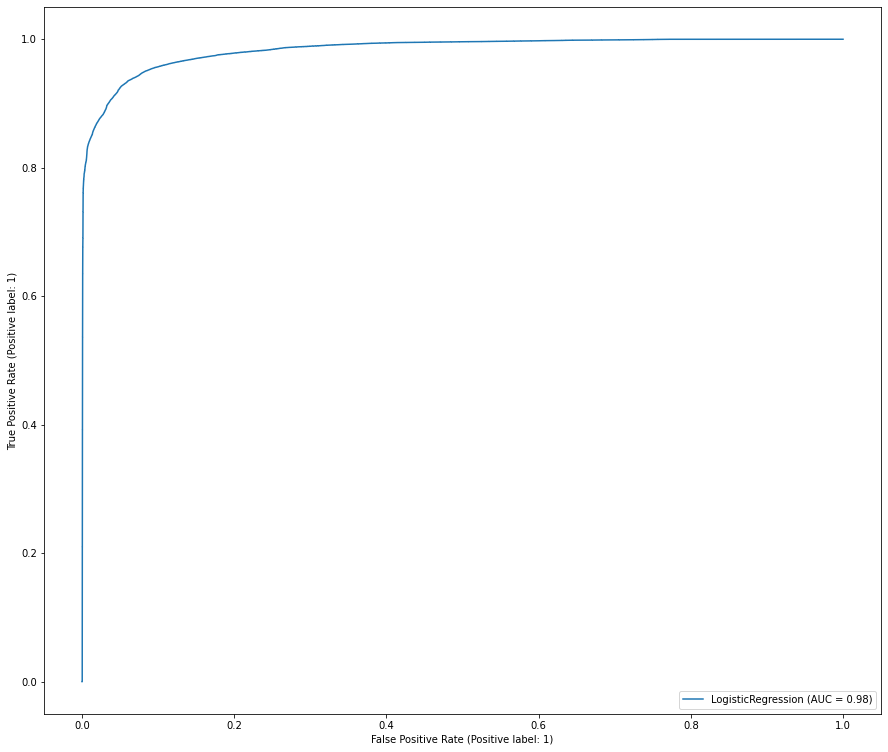

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(LR_DBSCAN_SMOTE , X_test_DBSCAN_SMOTE , Y_test_DBSCAN_SMOTE)



---
# RF EN SMOTE DBSCAN


In [ ]:
RF_DBSCAN_SMOTE=RandomForestClassifier()
RF_DBSCAN_SMOTE.fit(X_train_DBSCAN_SMOTE , Y_train_DBSCAN_SMOTE)
RandFor_DBSCAN_SMOTE_Predict=RF_DBSCAN_SMOTE.predict(X_train_DBSCAN_SMOTE)
RandFor_DBSCAN_SMOTE_Predict_TEST=RF_DBSCAN_SMOTE.predict(X_test_DBSCAN_SMOTE)
print( "Accuracy on training set :" , RF_DBSCAN_SMOTE.score(X_train_DBSCAN_SMOTE , Y_train_DBSCAN_SMOTE))
print( "Accuracy on testing set :" , RF_DBSCAN_SMOTE.score(X_test_DBSCAN_SMOTE , Y_test_DBSCAN_SMOTE))

Accuracy on training set : 1.0
Accuracy on testing set : 0.999894541342723


In [ ]:
precision_RF_DBSCAN_SM=precision_score(Y_test_DBSCAN_SMOTE,RandFor_DBSCAN_SMOTE_Predict_TEST)
recall_RF_DBSCAN_SM=recall_score(Y_test_DBSCAN_SMOTE,RandFor_DBSCAN_SMOTE_Predict_TEST)
SCOREF1_RF_DBSCAN_SM=f1_score(Y_test_DBSCAN_SMOTE,RandFor_DBSCAN_SMOTE_Predict_TEST)
print(" SCORE DE PRECISION  : {} " .format(precision_RF_DBSCAN_SM) )
print(" Recall Score  :{} " .format(recall_RF_DBSCAN_SM) )
print(" F1-Score  : {}" .format(SCOREF1_RF_DBSCAN_SM) )


 SCORE DE PRECISION  : 0.9997896753990325 
 Recall Score  :1.0 
 F1-Score  : 0.9998948266392437


In [ ]:
print("Matrice de confusion de RANDOM FOREST SUR MA DBSCAN ADASYN : " )
print(confusion_matrix(Y_test_DBSCAN_SMOTE,RandFor_DBSCAN_SMOTE_Predict_TEST))
print(classification_report(Y_test_DBSCAN_SMOTE,RandFor_DBSCAN_SMOTE_Predict_TEST))

Matrice de confusion de RANDOM FOREST SUR MA DBSCAN ADASYN : 
[[85101    18]
 [    0 85564]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85119
           1       1.00      1.00      1.00     85564

    accuracy                           1.00    170683
   macro avg       1.00      1.00      1.00    170683
weighted avg       1.00      1.00      1.00    170683



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


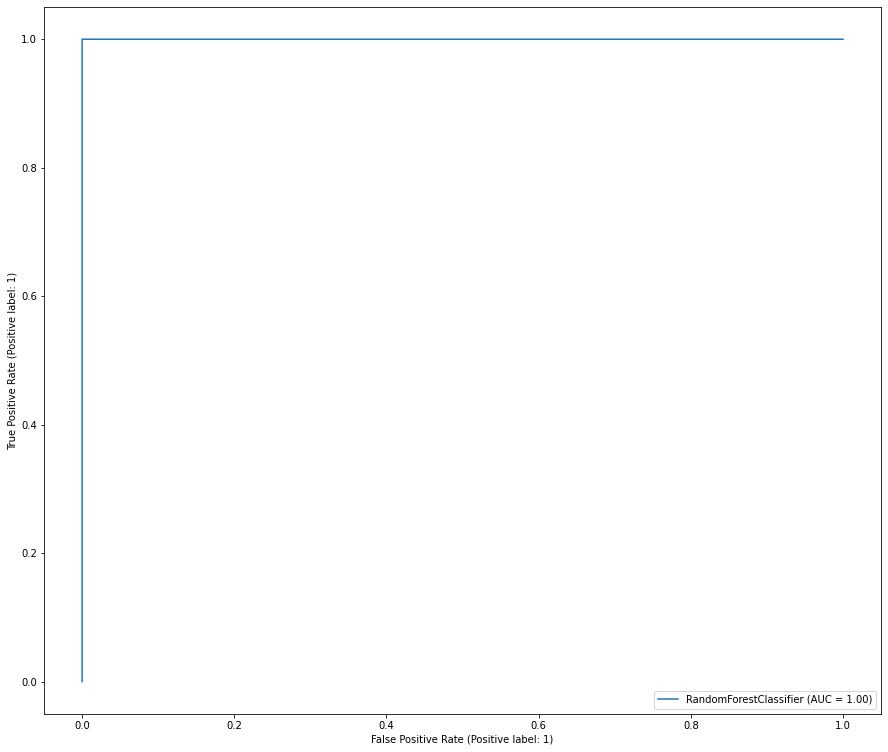

In [ ]:
plot_roc_curve(RF_DBSCAN_SMOTE , X_test_DBSCAN_SMOTE , Y_test_DBSCAN_SMOTE )



---
# SVM EN SMOTE DBSCAN


In [ ]:
SVM_DBSCAN_SMOTE=SVC()
SVM_DBSCAN_SMOTE.fit(X_train_DBSCAN_SMOTE , Y_train_DBSCAN_SMOTE)


SVC()

In [ ]:
print( "Accuracy on training set :" , SVM_DBSCAN_SMOTE.score(X_train_DBSCAN_SMOTE , Y_train_DBSCAN_SMOTE))
print( "Accuracy on testing set :" , SVM_DBSCAN_SMOTE.score(X_test_DBSCAN_SMOTE , Y_test_DBSCAN_SMOTE))

Accuracy on training set : 0.9894038803893949
Accuracy on testing set : 0.9891553347433546


In [ ]:
X_test_predict_SVM_DB_SM =SVM_DBSCAN_SMOTE.predict(X_test_DBSCAN_SMOTE)
SVMDB_auroc_DB_SM=roc_auc_score(Y_test_DBSCAN_SMOTE , X_test_predict_SVM_DB_SM)
precision_SVM_DB_SM=precision_score(Y_test_DBSCAN_SMOTE , X_test_predict_SVM_DB_SM)
recall_SVM_DB_SM=recall_score(Y_test_DBSCAN_SMOTE , X_test_predict_SVM_DB_SM)
SCOREF1_SVM_DB_SM=f1_score(Y_test_DBSCAN_SMOTE , X_test_predict_SVM_DB_SM)
print(" SCORE DE PRECISION  : {} " .format(precision_SVM_DB_SM) )
print(" Recall Score  :{} " .format(recall_SVM_DB_SM) )
print(" F1-Score  : {}" .format(SCOREF1_SVM_DB_SM) )
print("SVM Auroc : {} " .format(SVMDB_auroc_DB_SM))


 SCORE DE PRECISION  : 0.9863246075731698 
 Recall Score  :0.9921228554064794 
 F1-Score  : 0.9892152350099923
SVM Auroc : 0.9891475776815054 


In [ ]:
#X_test_predict_SVM =SVM_DBSCAN_SMOTE.predict(X_test_DBSCAN_ADASYN)
print("Matrice de confusion DE SVM SUR MA METHODE DBSCAN ADASYN : " )
print(confusion_matrix(Y_test_DBSCAN_SMOTE , X_test_predict_SVM_DB_SM))
print(classification_report(Y_test_DBSCAN_SMOTE , X_test_predict_SVM_DB_SM))

Matrice de confusion DE SVM SUR MA METHODE DBSCAN ADASYN : 
[[83942  1177]
 [  674 84890]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     85119
           1       0.99      0.99      0.99     85564

    accuracy                           0.99    170683
   macro avg       0.99      0.99      0.99    170683
weighted avg       0.99      0.99      0.99    170683



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


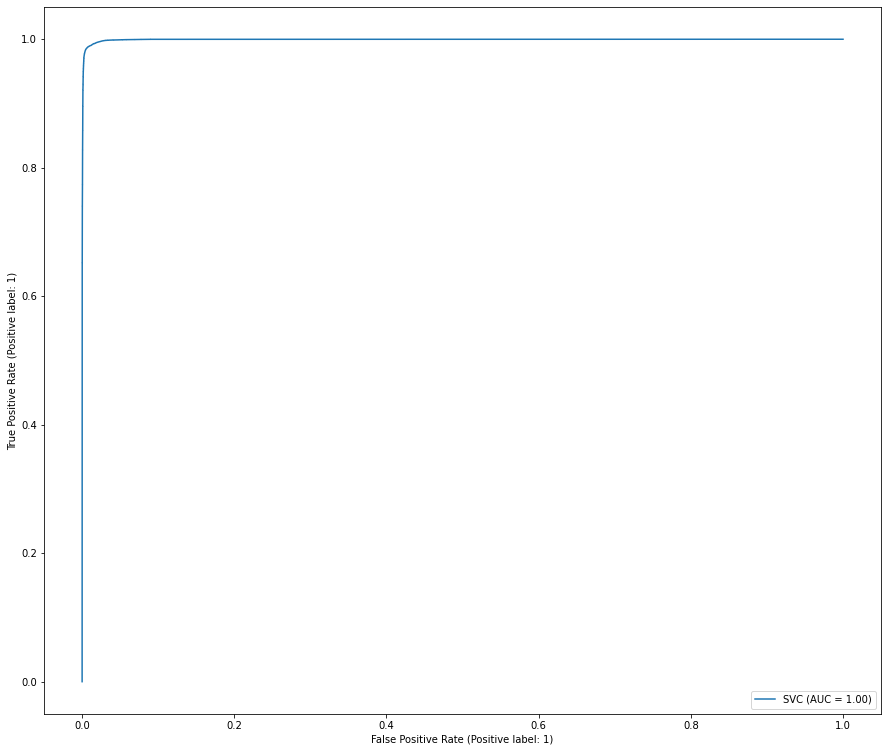

In [ ]:
plot_roc_curve(SVM_DBSCAN_SMOTE, X_test_DBSCAN_SMOTE , Y_test_DBSCAN_SMOTE )

*Les courbes AUC des classificateurs en DBSCAN SMOTE dans le meme graphe*

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

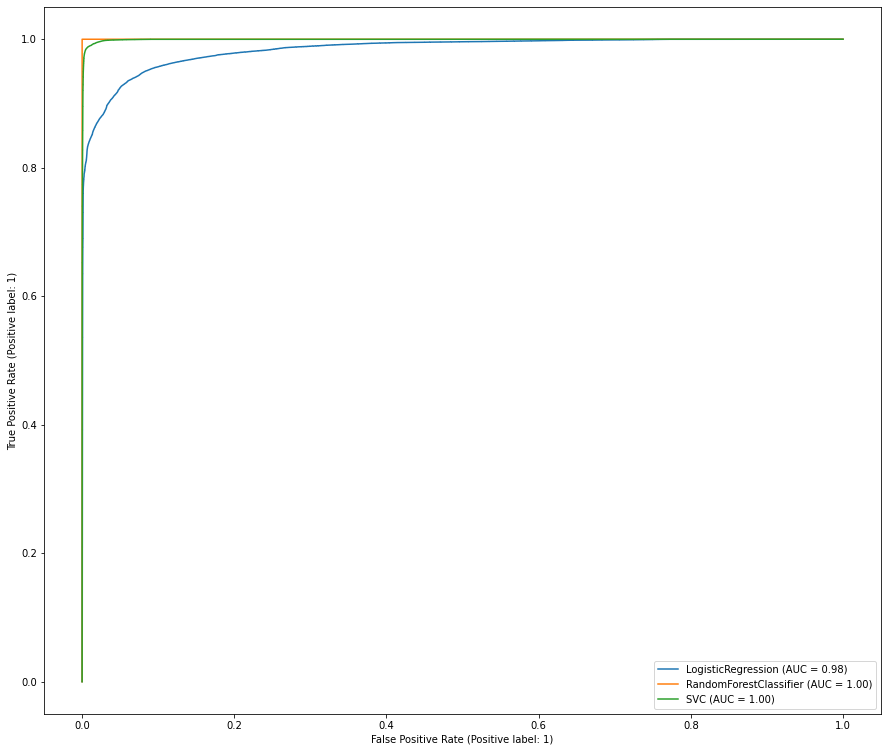

In [ ]:
DISPLAY_DBSCAN_SMOTE=plot_roc_curve(LR_DBSCAN_SMOTE , X_test_DBSCAN_SMOTE , Y_test_DBSCAN_SMOTE)
plot_roc_curve(RF_DBSCAN_SMOTE, X_test_DBSCAN_SMOTE , Y_test_DBSCAN_SMOTE , ax=DISPLAY_DBSCAN_SMOTE.ax_);
plot_roc_curve(SVM_DBSCAN_SMOTE, X_test_DBSCAN_SMOTE , Y_test_DBSCAN_SMOTE , ax=DISPLAY_DBSCAN_SMOTE.ax_)



---
# DB SCAN ADASYN


In [ ]:
ada = ADASYN(random_state=42)
X_ADASYN_DBSCAN , Y_ADASYN_DBSCAN = ada.fit_resample(X_DBSCAN_OVERSAMPLING , Y_DBSCAN_OVERSAMPLING)
print('Resampled Y dataset shape %s' % Counter(Y_DBSCAN_OVERSAMPLING))

COUNT_Y_BEFORE_ADA= np.bincount(Y_DBSCAN_OVERSAMPLING)
print("le calcule de Y avant adasyn:" , COUNT_Y_BEFORE_ADA )
COUNT_Y_AFTER_ADASYN= np.bincount(Y_ADASYN_DBSCAN)
print("le calcule de Y après adasyn:" , COUNT_Y_AFTER_ADASYN )

Resampled Y dataset shape Counter({0: 284471, 1: 336})
le calcule de Y avant adasyn: [284471    336]
le calcule de Y après adasyn: [284471 284448]


In [ ]:
X_train_DBSCAN_ADASYN , X_test_DBSCAN_ADASYN , Y_train_DBSCAN_ADASYN , Y_test_DBSCAN_ADASYN = train_test_split(X_ADASYN_DBSCAN , Y_ADASYN_DBSCAN , test_size=0.3  , random_state=2)



---
# LR DBSCAN ADASYN


In [ ]:
LR_DBSCAN_ADASYN = LogisticRegression(max_iter=len(DF_COMPLET_DE_MA_DBSCAN))
LR_DBSCAN_ADASYN.fit(X_train_DBSCAN_ADASYN , Y_train_DBSCAN_ADASYN)
X_train_prediction_DBSCAN_ADASYN=LR_DBSCAN_ADASYN.predict(X_train_DBSCAN_ADASYN)
training_data_accuracy = accuracy_score(X_train_prediction_DBSCAN_ADASYN, Y_train_DBSCAN_ADASYN)
print('Accuracy on training data =' , training_data_accuracy )
X_test_prediction_DBSCAN_ADASYN=LR_DBSCAN_ADASYN.predict(X_test_DBSCAN_ADASYN)
testing_data_accuracy = accuracy_score(X_test_prediction_DBSCAN_ADASYN, Y_test_DBSCAN_ADASYN)
print('Accuracy on testing data =' , testing_data_accuracy )

Accuracy on training data = 0.8749984306064388
Accuracy on testing data = 0.8756884389134969


In [ ]:
ConfMat=confusion_matrix(Y_test_DBSCAN_ADASYN,X_test_prediction_DBSCAN_ADASYN)
print("Confusion matrix : ")
print(ConfMat)
print(classification_report(Y_test_DBSCAN_ADASYN,X_test_prediction_DBSCAN_ADASYN))

Confusion matrix : 
[[75895  9111]
 [12106 73564]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88     85006
           1       0.89      0.86      0.87     85670

    accuracy                           0.88    170676
   macro avg       0.88      0.88      0.88    170676
weighted avg       0.88      0.88      0.88    170676



In [ ]:
LR_DBSCAN_ADASYN_auroc=roc_auc_score(Y_test_DBSCAN_ADASYN,X_test_prediction_DBSCAN_ADASYN)
precision_test=precision_score(Y_test_DBSCAN_ADASYN,X_test_prediction_DBSCAN_ADASYN)
recall_test=recall_score(Y_test_DBSCAN_ADASYN,X_test_prediction_DBSCAN_ADASYN)
SCOREF1_test=f1_score(Y_test_DBSCAN_ADASYN,X_test_prediction_DBSCAN_ADASYN)
print(" SCORE DE PRECISION test : {} " .format(precision_test) )
print(" Recall Score test :{} " .format(recall_test) )
print(" F1-Score test : {}" .format(SCOREF1_test) )
print("LR Auroc : {} " .format(LR_DBSCAN_ADASYN_auroc))

 SCORE DE PRECISION test : 0.8897973994557 
 Recall Score test :0.8586903233337224 
 F1-Score test : 0.8739671507915292
LR Auroc : 0.8757548268669647 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


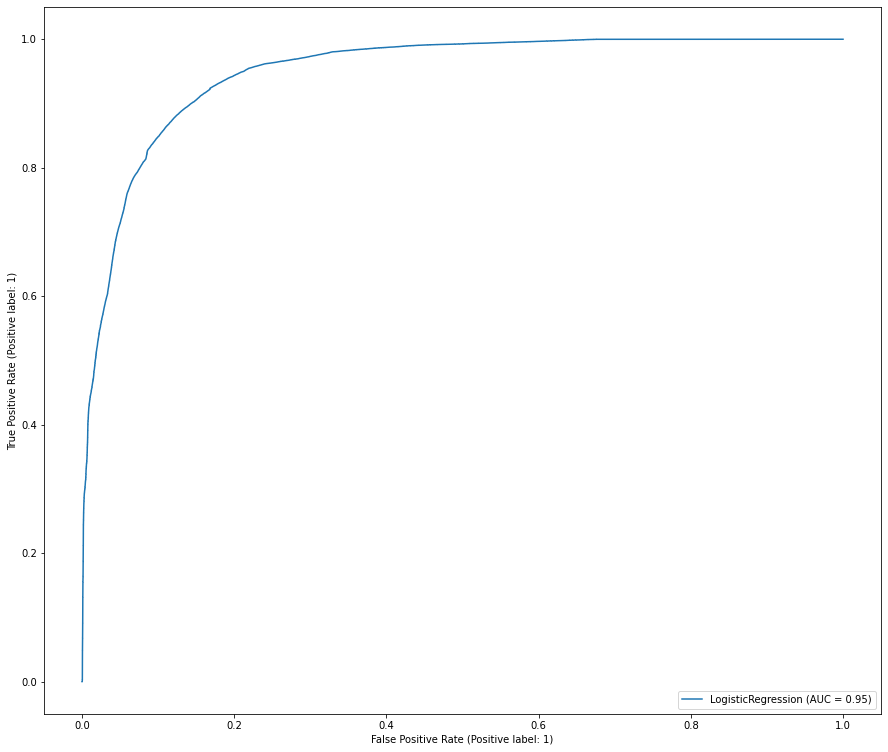

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(LR_DBSCAN_ADASYN , X_test_DBSCAN_ADASYN , Y_test_DBSCAN_ADASYN)



---
# RF DBSCAN ADASYN


In [ ]:
RF_DBSCAN_ADASYN=RandomForestClassifier()
RF_DBSCAN_ADASYN.fit(X_train_DBSCAN_ADASYN , Y_train_DBSCAN_ADASYN)
RandFor_DBSCAN_ADASYN_Predict=RF_DBSCAN_ADASYN.predict(X_train_DBSCAN_ADASYN)
RandFor_DBSCAN_ADASYN_Predict_TEST=RF_DBSCAN_ADASYN.predict(X_test_DBSCAN_ADASYN)
print( "Accuracy on training set :" , RF_DBSCAN_ADASYN.score(X_train_DBSCAN_ADASYN , Y_train_DBSCAN_ADASYN))
print( "Accuracy on testing set :" , RF_DBSCAN_ADASYN.score(X_test_DBSCAN_ADASYN , Y_test_DBSCAN_ADASYN))

Accuracy on training set : 1.0
Accuracy on testing set : 0.9998593826900092


In [ ]:
print("Matrice de confusion de RANDOM FOREST SUR MA DBSCAN ADASYN : " )
print(confusion_matrix(Y_test_DBSCAN_ADASYN , RandFor_DBSCAN_ADASYN_Predict_TEST))
print(classification_report(Y_test_DBSCAN_ADASYN , RandFor_DBSCAN_ADASYN_Predict_TEST))

Matrice de confusion de RANDOM FOREST SUR MA DBSCAN ADASYN : 
[[84986    20]
 [    3 85667]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85006
           1       1.00      1.00      1.00     85670

    accuracy                           1.00    170676
   macro avg       1.00      1.00      1.00    170676
weighted avg       1.00      1.00      1.00    170676



In [ ]:
precision_RF_DBSCAN_AD=precision_score(Y_test_DBSCAN_ADASYN,RandFor_DBSCAN_ADASYN_Predict_TEST)
recall_RF_DBSCAN_AD=recall_score(Y_test_DBSCAN_ADASYN,RandFor_DBSCAN_ADASYN_Predict_TEST)
SCOREF1_RF_DBSCAN_AD=f1_score(Y_test_DBSCAN_ADASYN,RandFor_DBSCAN_ADASYN_Predict_TEST)
print(" SCORE DE PRECISION  : {} " .format(precision_RF_DBSCAN_AD) )
print(" Recall Score  :{} " .format(recall_RF_DBSCAN_AD) )
print(" F1-Score  : {}" .format(SCOREF1_RF_DBSCAN_AD) )
SVMDB_auroc_ADASYN=roc_auc_score(Y_test_DBSCAN_ADASYN , RandFor_DBSCAN_ADASYN_Predict_TEST )
print("SVM Auroc : {} " .format(SVMDB_auroc_ADASYN))

 SCORE DE PRECISION  : 0.9997549248436187 
 Recall Score  :0.9999649819073188 
 F1-Score  : 0.9998599423429311
SVM Auroc : 0.9998589702610025 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


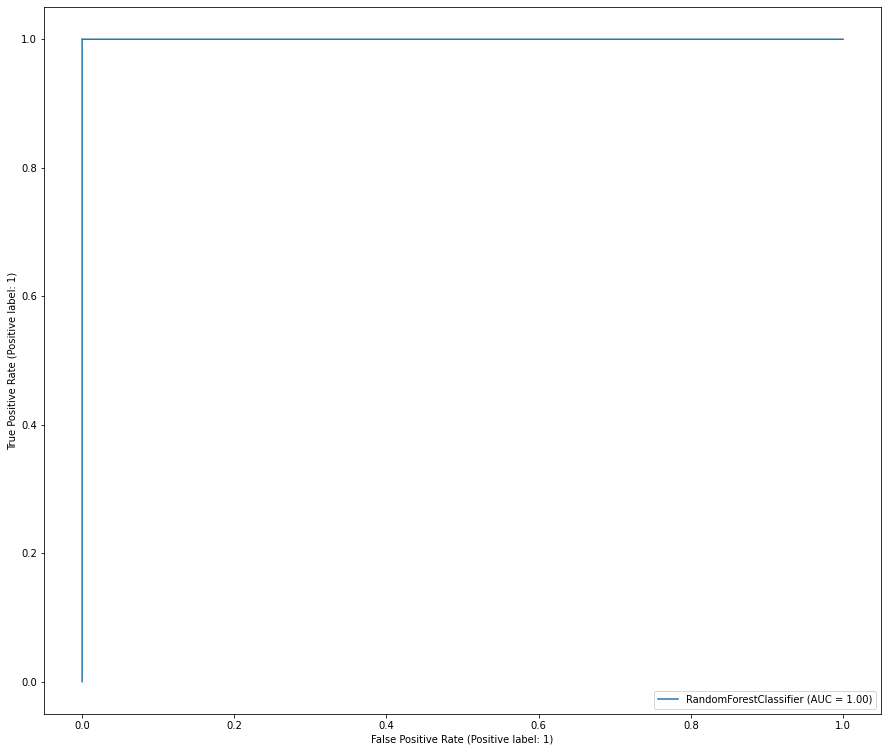

In [ ]:
plot_roc_curve(RF_DBSCAN_ADASYN , X_test_DBSCAN_ADASYN , Y_test_DBSCAN_ADASYN )



---

# SVM DBSCAN ADASYN

In [ ]:
SVM_DBSCAN_ADASYN=SVC()
SVM_DBSCAN_ADASYN.fit(X_train_DBSCAN_ADASYN , Y_train_DBSCAN_ADASYN)


SVC()

In [ ]:
print( "Accuracy on training set :" , SVM_DBSCAN_ADASYN.score(X_train_DBSCAN_ADASYN , Y_train_DBSCAN_ADASYN))
print( "Accuracy on testing set :" , SVM_DBSCAN_ADASYN.score(X_test_DBSCAN_ADASYN,Y_test_DBSCAN_ADASYN))

Accuracy on training set : 0.9958090914341244
Accuracy on testing set : 0.9955764137898708


In [ ]:
X_test_predict_SVM =SVM_DBSCAN_ADASYN.predict(X_test_DBSCAN_ADASYN)
print("Matrice de confusion DE SVM SUR MA METHODE DBSCAN ADASYN : " )
print(confusion_matrix(Y_test_DBSCAN_ADASYN , X_test_predict_SVM))
print(classification_report(Y_test_DBSCAN_ADASYN , X_test_predict_SVM))

Matrice de confusion DE SVM SUR MA METHODE DBSCAN ADASYN : 
[[84259   747]
 [    8 85662]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85006
           1       0.99      1.00      1.00     85670

    accuracy                           1.00    170676
   macro avg       1.00      1.00      1.00    170676
weighted avg       1.00      1.00      1.00    170676



In [ ]:
SVMDB_auroc_DB_ADA=roc_auc_score(Y_test_DBSCAN_ADASYN , X_test_predict_SVM)
precision_SVM_DB_AD=precision_score(Y_test_DBSCAN_ADASYN , X_test_predict_SVM)
recall_SVM_DB_AD=recall_score(Y_test_DBSCAN_ADASYN , X_test_predict_SVM)
SCOREF1_SVM_DB_AD=f1_score(Y_test_DBSCAN_ADASYN , X_test_predict_SVM)
print(" SCORE DE PRECISION  : {} " .format(precision_SVM_DB_AD) )
print(" Recall Score  :{} " .format(recall_SVM_DB_AD) )
print(" F1-Score  : {}" .format(SCOREF1_SVM_DB_AD) )
print("SVM Auroc : {} " .format(SVMDB_auroc_DB_ADA))


 SCORE DE PRECISION  : 0.991355067180502 
 Recall Score  :0.9999066184195168 
 F1-Score  : 0.9956124803142743
SVM Auroc : 0.9955595017138168 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


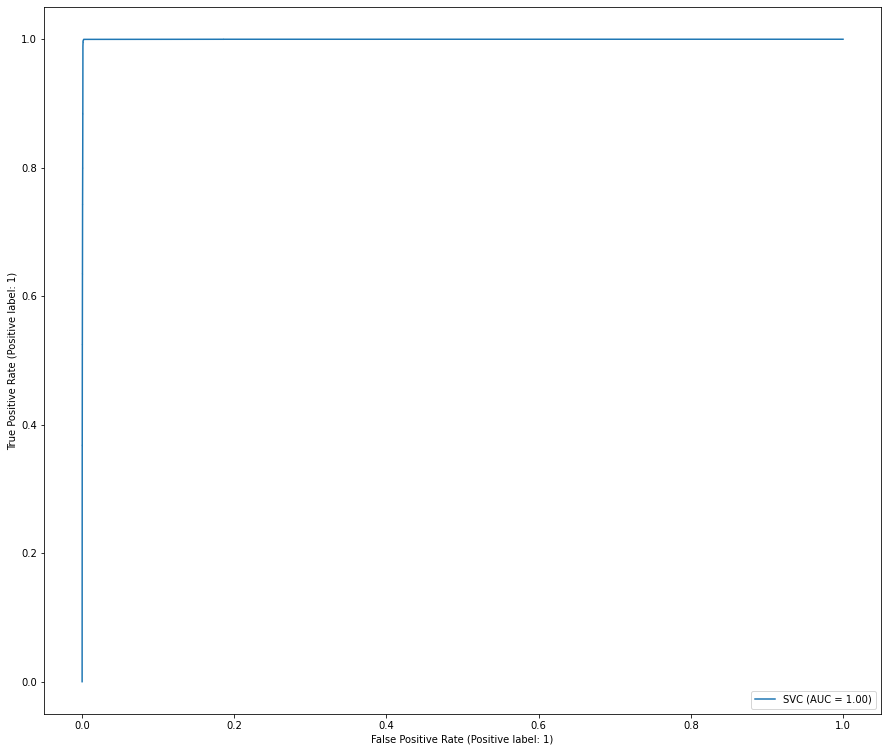

In [ ]:
plot_roc_curve(SVM_DBSCAN_ADASYN, X_test_DBSCAN_ADASYN , Y_test_DBSCAN_ADASYN )

*Les courbes AUC des classificateurs en DBSCAN ADASYN dans le meme graphe*

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

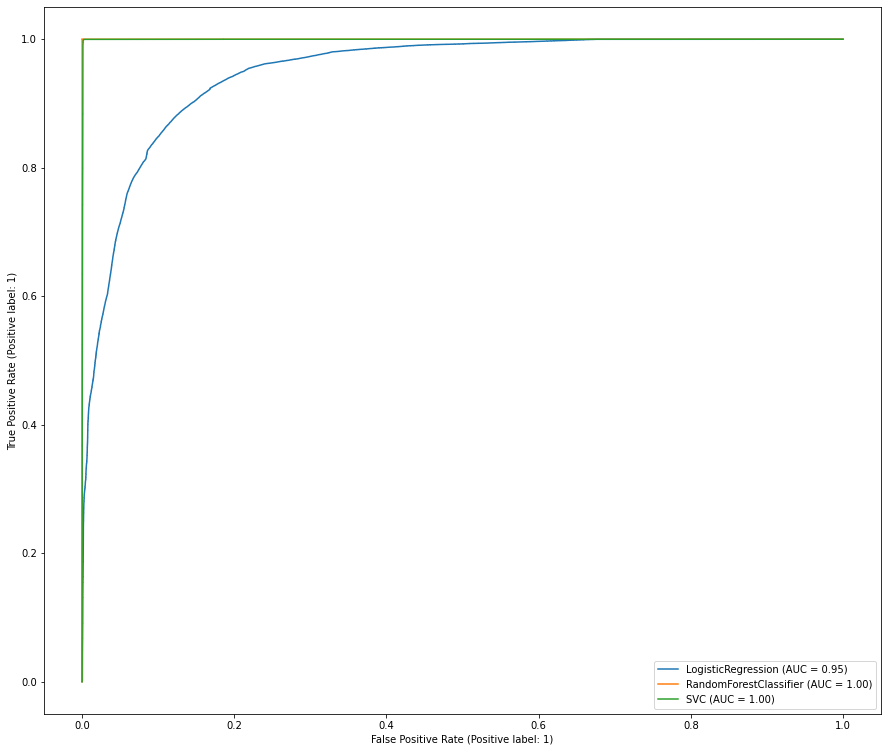

In [ ]:
DISPLAY_DBSCAN_ADASYN=plot_roc_curve(LR_DBSCAN_ADASYN , X_test_DBSCAN_ADASYN , Y_test_DBSCAN_ADASYN)
plot_roc_curve(RF_DBSCAN_ADASYN, X_test_DBSCAN_ADASYN , Y_test_DBSCAN_ADASYN , ax=DISPLAY_DBSCAN_ADASYN.ax_);
plot_roc_curve(SVM_DBSCAN_ADASYN, X_test_DBSCAN_ADASYN , Y_test_DBSCAN_ADASYN , ax=DISPLAY_DBSCAN_ADASYN.ax_)


ESSAI
---



In [ ]:
DF_KMEANS_SMOTE = pd.concat([DATAFRAME_OF_REST_CLUSTERS , DATAFRAME_OF_CLUSTER1], axis=0)


In [ ]:
DF_KMEANS_SMOTE

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
10690,-12.224021,3.854150,-12.466766,9.648311,-2.726961,-4.445610,-21.922811,0.320792,-4.433162,-11.201400,...,-2.147181,-1.159830,-1.504119,-19.254328,0.544867,-4.781606,-0.007772,3.052358,-0.775036,1
10801,-14.474437,6.503185,-17.712632,11.270352,-4.150142,-3.372098,-16.535807,-1.443947,-6.815273,-13.670545,...,1.101250,-2.475962,0.342391,-3.564508,-0.818140,0.153408,0.755079,2.706566,-0.992916,1
10891,-12.339603,4.488267,-16.587073,10.107274,-10.420199,0.130670,-15.600323,-1.157696,-5.304631,-12.938929,...,-0.085501,-2.089610,1.745315,1.376816,-0.554271,-1.610741,0.153725,1.212477,-1.869290,1
10897,-15.398845,7.472324,-19.026912,11.165526,-6.893856,-2.120937,-14.913330,-0.721214,-7.175097,-14.166795,...,1.111502,-2.444884,0.727495,-0.345078,-0.981749,0.995271,0.816762,2.262942,-1.178063,1
11343,-14.179165,7.421370,-21.405836,11.927512,-7.974281,-2.202710,-15.471612,-0.356595,-6.380125,-13.348278,...,1.002764,-2.366836,1.130955,0.991153,-1.033132,-0.327179,0.634693,2.171905,-1.395288,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154720,-5.552122,5.678134,-9.775528,8.416295,-4.409844,-1.506235,-6.899839,3.750443,-3.879793,-6.864164,...,-0.064780,1.128472,0.228484,0.286258,-0.536294,-0.104925,0.420919,-0.297557,-0.946184,1
178208,-5.904921,4.439911,-8.631802,7.788684,-4.989580,-1.200144,-7.674060,4.125761,-5.315778,-4.891156,...,-0.505608,1.775030,1.266441,-0.199410,0.014960,-0.000019,0.544210,-1.167566,-1.206354,1
243848,-4.124316,3.748597,-7.926507,7.763242,-0.769375,-2.031171,-3.474549,0.107121,-1.551352,-2.411272,...,-0.181979,0.547097,0.687854,0.429939,-0.620601,-0.369688,0.367349,-2.664767,0.417101,1
244004,-4.673231,4.195976,-8.392423,7.743215,-1.138803,-2.094899,-3.839487,0.543053,-1.528448,-2.325113,...,-0.180279,0.554185,0.656076,0.482417,-0.624399,-0.296289,0.374802,-2.678544,0.412368,1


In [ ]:
DATAFRAME_OF_CLUSTER1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,CLUSTER
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,0
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,0
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,0
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,0


In [ ]:
SMOTE_FONCTION=SMOTE()
X_CLUSTER_SMOTE , Y_CLUSTER_SMOTE = SMOTE_FONCTION.fit_resample(X_train,Y_train)



**SMOTE_SUR_KMEANS**
---



In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.3 , stratify=Y , random_state=2)
SM=SMOTE()
X_ROS , Y_ROS = SM.fit_resample(X_train,Y_train)

In [ ]:
DATA_FRAME_SMOTE_KMEANS=pd.DataFrame()
df = pd.DataFrame(, columns=['Numbers'])


**LA_SUITE_DE_CLUSTERING_KMEANS**

In [ ]:
kmeansK4 = KMeans(n_clusters=4)
kmeansK4.fit(XSCORESILHOUETTE)
Cluster_LabelK4=kmeansK4.fit_predict(XSCORESILHOUETTE)
silhouette_score(XSCORESILHOUETTE,Cluster_LabelK4)

0.3054419399384461

In [ ]:
kmeans = KMeans(n_clusters=5 , )
kmeans.fit(XSCORESILHOUETTE)
Cluster_Label=kmeans.fit_predict(XSCORESILHOUETTE)
labels=kmeans.labels_
silhouette_score(XSCORESILHOUETTE,Cluster_Label)

0.3027946884431206

In [ ]:
kmeansK6 = KMeans(n_clusters=6)
kmeansK6.fit(XSCORESILHOUETTE)
Cluster_LabelK6=kmeansK6.fit_predict(XSCORESILHOUETTE)
silhouette_score(XSCORESILHOUETTE,Cluster_LabelK6)

0.3304419647596748

In [ ]:
kmeansK1 = KMeans(n_clusters=10)
kmeansK1.fit(XSCORESILHOUETTE)
Cluster_LabelK=kmeansK1.fit_predict(XSCORESILHOUETTE)
silhouette_score(XSCORESILHOUETTE,Cluster_LabelK)

0.3163915683365181

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


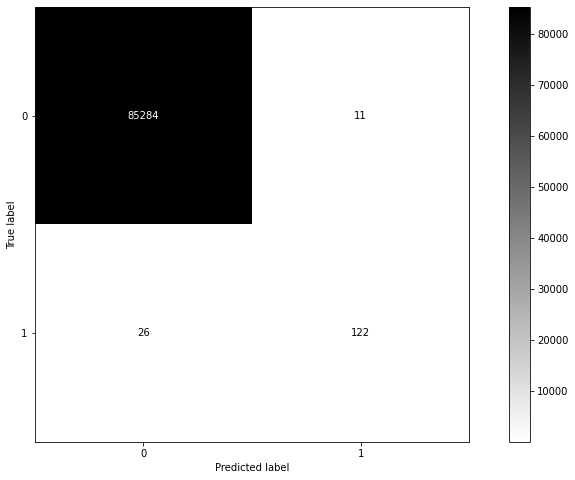

In [ ]:
plot_confusion_matrix(RF, X_test, Y_test, cmap="binary")

# **KMEANS_SMOTE Predefinie**

In [ ]:
KMSM_Predefini = KMeansSMOTE( )


In [ ]:
X_CORRECT = df.drop(columns=['Time','Amount'], axis=1)
Y_CORRECT = df['Class']
#Split

In [ ]:
len(X_CORRECT)

284807

In [ ]:
X_CORRECT.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
XCORRECT_A_REMPLACER = X_CORRECT.iloc[:30000]

In [ ]:
len(XCORRECT_A_REMPLACER)

30000

In [ ]:
XCORRECT_A_REMPLACER.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
XCORRECT_A_REMPLACER = XCORRECT_A_REMPLACER.replace(to_replace=0 , value = 1 )

In [ ]:
XCORRECT_A_REMPLACER.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,1


In [ ]:
len(XCORRECT_A_REMPLACER)

30000

In [ ]:
XCORRECT_A_REMPLACER2 = X_CORRECT.iloc[30000 :]

In [ ]:
len(XCORRECT_A_REMPLACER2)

254807

In [ ]:
XCORRECT_A_REMPLACER_KMSMOTE=XCORRECT_A_REMPLACER.append(XCORRECT_A_REMPLACER2)

In [ ]:
Counter(XCORRECT_A_REMPLACER_KMSMOTE['Class'])

Counter({0: 254409, 1: 30398})

In [ ]:
#len(XCORRECT_A_REMPLACER_KMSMOTE['Class'] == 0)

284807

In [ ]:
XCORRECT_A_REMPLACER_KMSMOTE.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,1


In [ ]:
#NV_DF_REFAIT =X_CORRECT.loc[X_CORRECT['Class'] == 1]

In [ ]:
X_REFAIT = XCORRECT_A_REMPLACER_KMSMOTE.drop(columns=['Class'], axis=1)
Y_REFAIT = XCORRECT_A_REMPLACER_KMSMOTE['Class']

In [ ]:
X_REFAIT.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [ ]:
#df['Class'] = df.loc['column name'].replace(['old value'],'new value')
#DATAFRAME_OF_CLUSTER1['Class']=DATAFRAME_OF_CLUSTER1['Class'].replace(to_replace=0 , value = 1 )

In [ ]:
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [ ]:
feature_colonnes=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
XSCORESILHOUETTE=fraud[feature_colonnes].values
YSCORESILHOUETTE=fraud.values

In [ ]:
X = df.drop(columns=['Time','Amount','Class'], axis=1)
Y = df['Class']
#Split

In [ ]:
Counter(Y)

Counter({0: 284315, 1: 492})

In [ ]:
KMeans_Smote_Predefini = KMeansSMOTE( sampling_strategy='auto' )
X_Kmeans_Smote, Y_Kmeans_Smote = KMeans_Smote_Predefini.fit_resample(X , Y)


RuntimeError: ignored

In [ ]:
X_train_KM_SM_PREDEF , X_test_KM_SM_PREDEF , Y_train_KM_SM_PREDEF , Y_test_KM_SM_PREDEF = train_test_split(X_REFAIT , Y_REFAIT , test_size=0.3  , random_state=2)

In [ ]:
#X_trainKMEAN , X_testKMEAN , Y_trainMEAN , Y_testMEAN = train_test_split(XFRAUDE2 , YFRAUDE2 , test_size=0.3  , random_state=2)

In [ ]:
Counter(Y_REFAIT)

Counter({0: 254409, 1: 30398})

In [ ]:
KMSM_Predefini = KMeansSMOTE( sampling_strategy='auto' )
#X_KMSM, Y_KMSM = KMSM_Predefini.fit_resample(X_train_KM_SM_PREDEF , Y_train_KM_SM_PREDEF)

#X_KMSM, Y_KMSM = KMSM_Predefini.fit_resample(XSCORESILHOUETTE , YSCORESILHOUETTE)
#kmeans_args={  'n_clusters': 100 }, smote_args={ 'k_neighbors': 10  }

In [ ]:
X_KMSM, Y_KMSM = KMSM_Predefini.fit_resample(X_REFAIT , Y_REFAIT)


RuntimeError: ignored

In [ ]:
Counter(Y_REFAIT)

Counter({0: 204511, 1: 80296})

**Ma_Methode_De_Kmeans_+_SMOTE**

*KMEANS SUR LA CLASS MIN*

In [ ]:
#feature_colonnes=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
#XSCORESILHOUETTE=fraud[feature_colonnes].values
#YSCORESILHOUETTE=fraud.values

In [ ]:
kmeans = KMeans(n_clusters=3)
CLASSIFICATION_KMEANS=kmeans.fit(XFRAUDE)
Cluster_Label=kmeans.fit_predict(XFRAUDE)
labels=kmeans.labels_
silhouette_score(XFRAUDE,Cluster_Label)


0.6352712544929572

(array([198.,   0.,   0.,   0.,   0., 136.,   0.,   0.,   0., 158.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

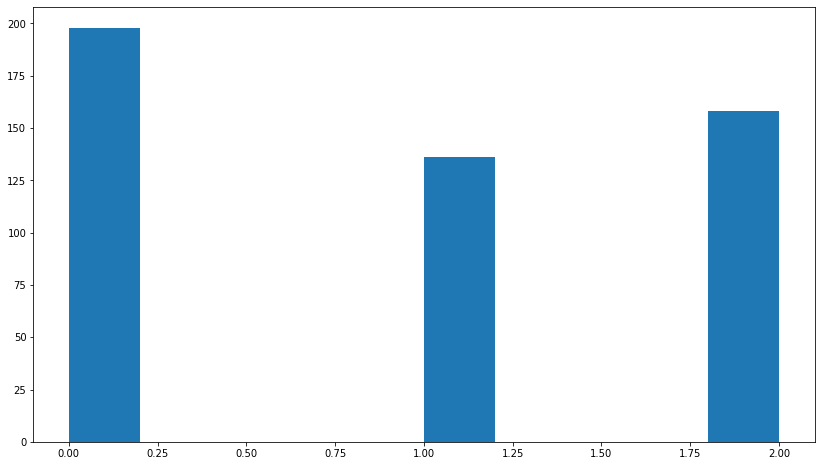

In [ ]:
plt.hist(labels)

In [ ]:
#pd.crosstab(labels , YFRAUDE2 , rownames=['Clusters'] , colnames=['Classes'])
pd.crosstab(labels , YFRAUDE , rownames=['Clusters'] , colnames=['Classes'])

Classes,1
Clusters,
0,198
1,136
2,158


In [ ]:
labels.shape

(492,)

In [ ]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = XFRAUDE.index.values
cluster_map['cluster'] = labels

In [ ]:
cluster_map

,data_index,cluster
0,541,0
1,623,0
2,4920,0
3,6108,0
4,6329,0
...,...,...
487,279863,1
488,280143,1
489,280149,1
490,281144,1


In [ ]:
CLUSTER1= cluster_map[cluster_map.cluster == 0]
CLUSTER2= cluster_map[cluster_map.cluster == 1]
CLUSTER3= cluster_map[cluster_map.cluster == 2]

In [ ]:
CLUSTER1.head()

,data_index,cluster
0,541,0
1,623,0
2,4920,0
3,6108,0
4,6329,0


In [ ]:
CLUSTER2.head()

,data_index,cluster
356,163149,1
357,163586,1
358,167184,1
359,167305,1
360,172787,1


In [ ]:
CLUSTER3.head()

,data_index,cluster
198,81609,2
199,82400,2
200,83053,2
201,83297,2
202,83417,2


In [ ]:
print('la taille du cluster 1 est :' , len(CLUSTER1))
print('la taille du cluster 2 est :' , len(CLUSTER2))
print('la taille du cluster 3 est :' , len(CLUSTER3))

la taille du cluster 1 est : 198
la taille du cluster 2 est : 136
la taille du cluster 3 est : 158


In [ ]:
DATAPOINTS_OF_CLUSTER1= CLUSTER1.loc[:, 'data_index'].values
DATAPOINTS_OF_CLUSTER2= CLUSTER2.loc[:, 'data_index'].values
DATAPOINTS_OF_CLUSTER3= CLUSTER3.loc[:, 'data_index'].values

#XKMEANS = fraud.loc[:, feature_colonnes].values
#CLUSTER1[CLUSTER1.data_index]

In [ ]:
print(DATAPOINTS_OF_CLUSTER1)

[  541   623  4920  6108  6329  6331  6334  6336  6338  6427  6446  6472
  6529  6609  6641  6717  6719  6734  6774  6820  6870  6882  6899  6903
  6971  8296  8312  8335  8615  8617  8842  8845  8972  9035  9179  9252
  9487  9509 10204 10484 10497 10498 10568 10630 10690 10801 10891 10897
 11343 11710 11841 11880 12070 12108 12261 12369 14104 14170 14197 14211
 14338 15166 15204 15225 15451 15476 15506 15539 15566 15736 15751 15781
 15810 16415 16780 16863 17317 17366 17407 17453 17480 18466 18472 18773
 18809 20198 23308 23422 26802 27362 27627 27738 27749 29687 30100 30314
 30384 30398 30442 30473 30496 31002 33276 39183 40085 40525 41395 41569
 41943 42007 42009 42473 42528 42549 42590 42609 42635 42674 42696 42700
 42741 42756 42769 42784 42856 42887 42936 42945 42958 43061 43160 43204
 43428 43624 43681 43773 44001 44091 44223 44270 44556 45203 45732 46909
 46918 46998 47802 48094 50211 50537 52466 52521 52584 53591 53794 55401
 56703 57248 57470 57615 58422 58761 59539 61787 63

In [ ]:
RATIO_REFERENCE= (100/CLASSIFICATION_KMEANS.n_clusters)
print('le ratio reference est : %' ,  RATIO_REFERENCE )
ratio=(CLASSIFICATION_KMEANS.n_clusters/100)
print('le ratio est : ' , ratio )

le ratio reference est : % 33.333333333333336
le ratio est :  0.03


In [ ]:
CENTROIDES= CLASSIFICATION_KMEANS.cluster_centers_
print(CLASSIFICATION_KMEANS.cluster_centers_)

[[ 3.33631566e+04 -6.47114242e+00  4.61500413e+00 -8.64265485e+00
   5.16364009e+00 -4.72631979e+00 -1.98252701e+00 -6.83951300e+00
   3.00515709e+00 -3.10658800e+00 -6.58101030e+00  4.70402892e+00
  -7.48800671e+00  5.81631634e-02 -7.91664925e+00  2.14582788e-01
  -5.10976341e+00 -8.66490419e+00 -3.14022337e+00  7.94433313e-01
   3.81223589e-01  7.54921426e-01 -1.56429023e-01 -2.22225965e-01
  -9.21806175e-02  2.29927721e-01  8.93108556e-02  5.68505288e-01
   5.39003176e-02  9.39927778e+01]
 [ 1.45606691e+05 -1.40739402e+00  1.54169305e+00 -4.48474432e+00
   3.59947477e+00  1.24253519e-01 -1.27150587e+00 -1.67208769e+00
   2.76527389e-02 -1.78569699e+00 -3.07359776e+00  2.37141792e+00
  -3.62105589e+00 -3.92048896e-01 -6.17473092e+00 -1.06057537e-01
  -1.99784232e+00 -2.66071488e+00 -4.82960709e-01  2.77324652e-01
   2.63529892e-01  5.71859635e-01  9.79346283e-02 -2.78954065e-02
  -1.87212583e-01 -6.15704360e-02  9.04070856e-02  1.41868408e-01
   1.58186741e-01  1.48927868e+02]
 [ 8.4

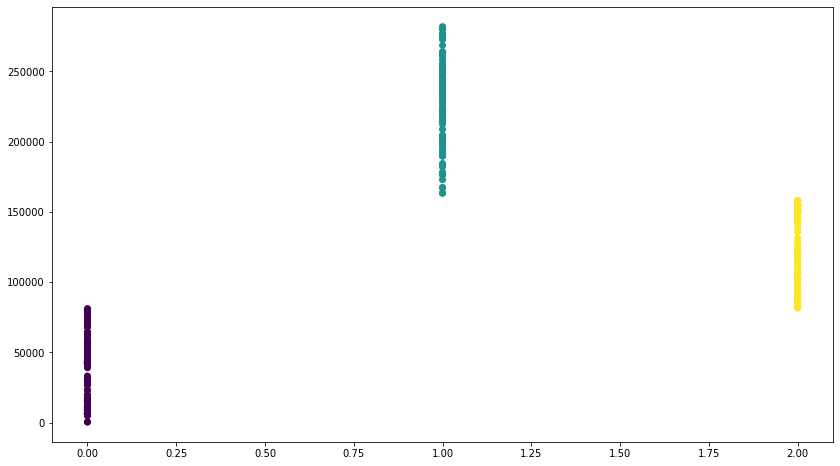

In [ ]:
plt.scatter( cluster_map['cluster'],cluster_map['data_index'], c=labels.astype(float) ,  alpha=5)
#plt.scatter(CENTROIDES[:, 0], CENTROIDES[:, 2], c='red', s=50)
plt.show()

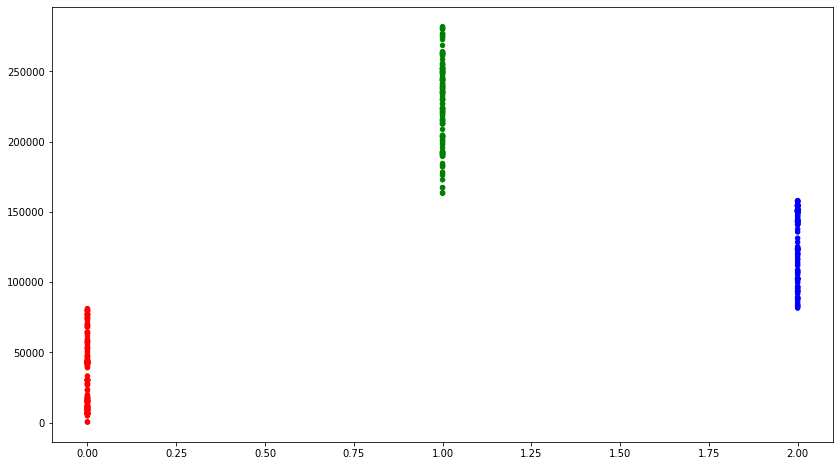

In [ ]:
colormap=np.array(["red", "green", "blue"])
plt.scatter(cluster_map.cluster, cluster_map.data_index , c=colormap[labels], s=20)
